In [1]:
import scanpy as sc
from scprint import scPrint
from scdataloader import Preprocessor
from scprint.tasks import GRNfer

from grnndata import read_h5ad, from_anndata
from bengrn import BenGRN, get_sroy_gt

import numpy as np
import pandas as pd

%load_ext autoreload
%autoreload 2

import torch
torch.set_float32_matmul_precision('medium')

💡 loaded instance: jkobject/scprint


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/umap/__init__.py:9: ImportWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn(
2024-04-04 17:45:00,321:INFO - Downloading data from `https://omnipathdb.org/queries/enzsub?format=json`
2024-04-04 17:45:00,321:INFO - Downloading data from `https://omnipathdb.org/queries/enzsub?format=json`
2024-04-04 17:45:00,433:INFO - Downloading data from `https://omnipathdb.org/queries/interactions?format=json`
2024-04-04 17:45:00,522:INFO - Downloading data from `https://omnipathdb.org/queries/complexes?format=json`
2024-04-04 17:45:00,617:INFO - Downloading data from `https://omnipathdb.org/queries/annotations?format=json`
2024-04-04 17:45:00,711:INFO - Downloading data from `https://omnipathdb.org/queries/intercell?format=json`
2024-04-04 17:45:00,892:INFO - Downloading data from `https://omnipathdb.org/about?format=text`
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/arboreto/core.py:12: 

# Load Model and data

In [2]:
#model = scPrint.load_from_checkpoint('../../data/tensorboard/scprint_test/urxxwu28/checkpoints/epoch=0-step=20000.ckpt') #chocolate-surf-8
model = scPrint.load_from_checkpoint('../../data/temp/cmgiqxw/epoch=3-step=20000.ckpt', precpt_gene_emb = '../../data/temp/embeddings.parquet')
# ../../data/temp/epoch=4-step=12500.ckpt latest model maestro (fortuitous laugther)
# ../../data/logs/scprint_test/f4vao230/checkpoints/epoch=10-step=27500.ckpt looked good as a training run (vermlillion noodle)
# d1792z9k/epoch=3-step=10000.ckpt
# '../../data/temp/d1792z9k/epoch=3-step=10000.ckpt'
# '../../data/temp/6q3dzi3x/epoch=3-step=10000.ckpt'
# '../../data/temp/grsachbg/epoch=2-step=15000.ckpt'
## post debug
# "../lightning_logs/version_14/checkpoints/epoch=1-step=5000.ckpt"

### random dataset

In [3]:
#only dataset dropped
adata = sc.read_h5ad('/home/ml4ig1/scprint/.lamindb/z7ZZxORUQFshySbuvNW7.h5ad') 

# one that it trained on: z7ZZxORUQFshySbuvNW7.
# untrained on: BljRloq1xjcxRNDpejzI
# and yBCKp6HmXuHa0cZptMo7

In [ ]:
adata = sc.read(
    "data/pancreas_atlas.h5ad",
    backup_url="https://figshare.com/ndownloader/files/24539828",
)


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/anndata/_io/specs/registry.py:249: OldFormatWarning: Element '/X' was written without encoding metadata.
  return self.callback(read_func, elem.name, elem, iospec=get_spec(elem))
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/anndata/_io/specs/registry.py:249: OldFormatWarning: Element '/X' was written without encoding metadata.
  return self.callback(read_func, elem.name, elem, iospec=get_spec(elem))
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/anndata/_io/specs/registry.py:249: OldFormatWarning: Element '/layers' was written without encoding metadata.
  return self.callback(read_func, elem.name, elem, iospec=get_spec(elem))
/home/ml4ig1/miniconda3/envs/scprint

# Run tests

Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

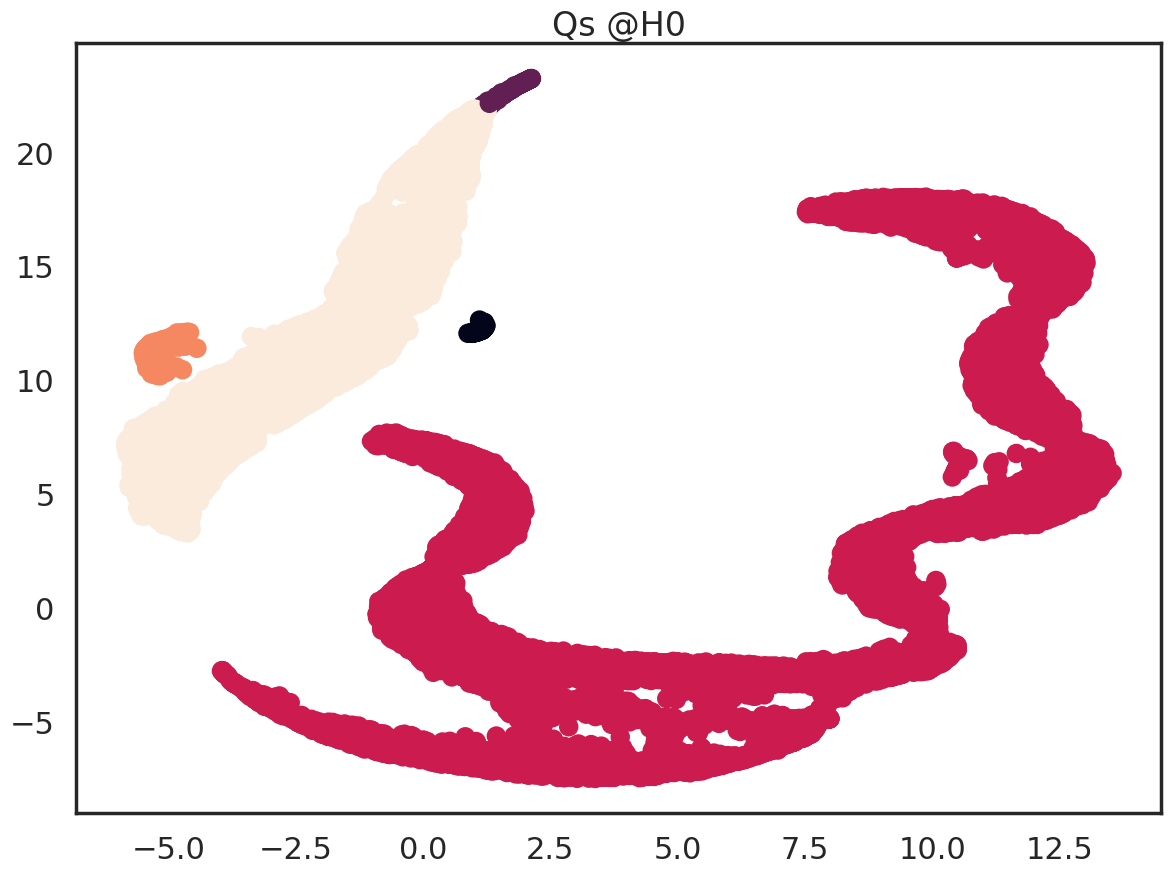

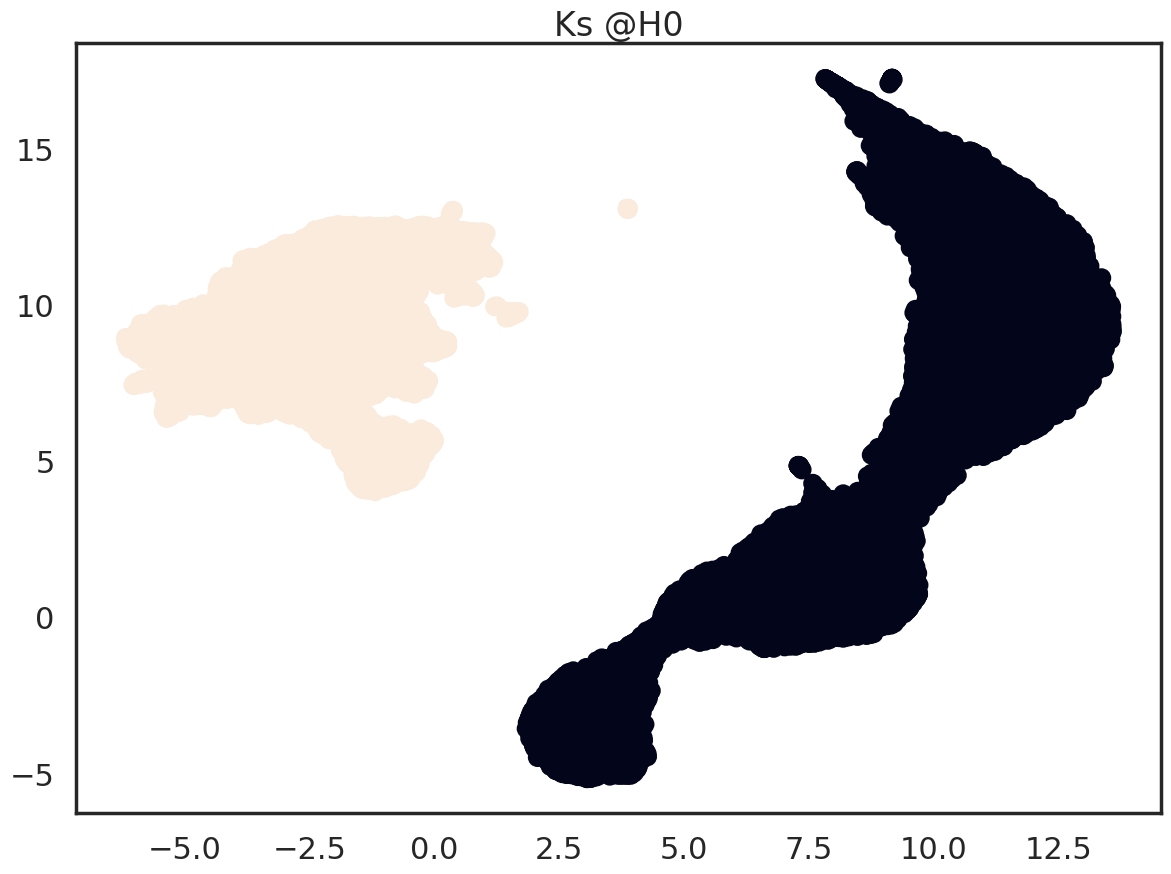

avg link count: 1025947406, sparsity: 0.9098914430469649



In [ ]:
grn_inferer = GRNfer(model, adata,
    how="random expr",
    preprocess="softmax",
    head_agg='max',
    cell_agg="mean",
    filtration="thresh",
    #k=
    #genes=
    #known_grn
)
grn = grn_inferer(cell_type="oligodendrocyte precursor cell", layer=3)

In [ ]:
grn = from_anndata(grn)

base enrichment
Top central genes: []


2024-04-03 14:21:15,162 [WARNING] Duplicated values found in preranked stats: 83.68% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


[]


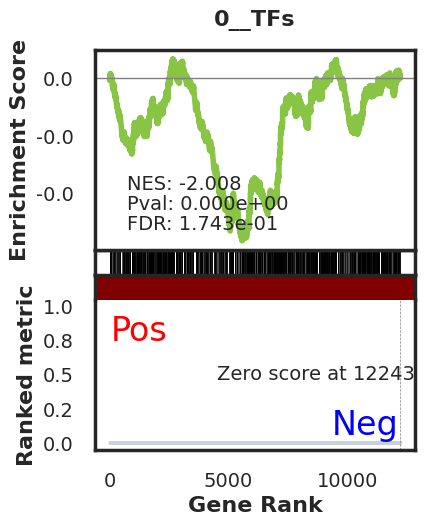

2024-04-03 14:21:30,708 [WARNING] Duplicated values found in preranked stats: 0.29% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


[]


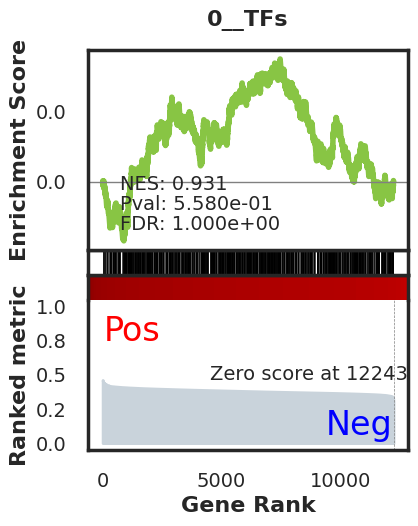

_________________________________________
TF specific enrichment


2024-04-03 14:21:35,868:INFO - Downloading and generating Enrichr library gene sets...
2024-04-03 14:21:35,872:INFO - Library is already downloaded in: /home/ml4ig1/.cache/gseapy/Enrichr.ENCODE_TF_ChIP-seq_2014.gmt, use local file
2024-04-03 14:21:36,658:INFO - 0332 gene_sets have been filtered out when max_size=2000 and min_size=0
2024-04-03 14:21:36,702 [WARNING] Duplicated values found in preranked stats: 18.16% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


found!  0__ZBTB33
0    1.120213
Name: NES, dtype: object




2024-04-03 14:21:37,564 [WARNING] Duplicated values found in preranked stats: 1.49% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-03 14:21:38,368 [WARNING] Duplicated values found in preranked stats: 18.04% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-03 14:21:39,205 [WARNING] Duplicated values found in preranked stats: 1.00% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-03 14:21:39,986 [WARNING] Duplicated values found in preranked stats: 18.61% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-03 14:21:40,762 [WARNING] Duplicated values found in preranked stats: 1.38% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-03 14:21:41,560 [WARNING] Duplicated values found in preranked stats: 18.96% of genes
The order of those genes will

found!  0__ZZZ3
0    1.413357
Name: NES, dtype: object




2024-04-03 14:21:43,163 [WARNING] Duplicated values found in preranked stats: 12.00% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-03 14:21:43,970 [WARNING] Duplicated values found in preranked stats: 12.36% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-03 14:21:44,753 [WARNING] Duplicated values found in preranked stats: 13.09% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


found!  0__BRF1
0    1.83987
Name: NES, dtype: object




2024-04-03 14:21:45,541 [WARNING] Duplicated values found in preranked stats: 15.01% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-03 14:21:46,346 [WARNING] Duplicated values found in preranked stats: 13.49% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


found!  0__SETDB1
0    1.196182
Name: NES, dtype: object




2024-04-03 14:21:47,192 [WARNING] Duplicated values found in preranked stats: 18.96% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-03 14:21:47,995 [WARNING] Duplicated values found in preranked stats: 12.36% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-03 14:21:48,773 [WARNING] Duplicated values found in preranked stats: 18.16% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-03 14:21:49,567 [WARNING] Duplicated values found in preranked stats: 17.06% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-03 14:21:50,351 [WARNING] Duplicated values found in preranked stats: 7.60% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-03 14:21:51,140 [WARNING] Duplicated values found in preranked stats: 1.49% of genes
The order of those genes wil

found!  0__SRF
0    1.251888
Name: NES, dtype: object




2024-04-03 14:21:53,621 [WARNING] Duplicated values found in preranked stats: 15.04% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


found!  0__SRF
0    1.333054
Name: NES, dtype: object




2024-04-03 14:21:54,423 [WARNING] Duplicated values found in preranked stats: 1.59% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-03 14:21:55,232 [WARNING] Duplicated values found in preranked stats: 15.04% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


found!  0__SRF
0    1.270881
Name: NES, dtype: object




2024-04-03 14:21:56,064 [WARNING] Duplicated values found in preranked stats: 18.04% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


found!  0__SP2
0    1.05533
Name: NES, dtype: object




2024-04-03 14:21:56,896 [WARNING] Duplicated values found in preranked stats: 18.78% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-03 14:21:57,730 [WARNING] Duplicated values found in preranked stats: 17.32% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


found!  0__SMC3
0    1.141319
Name: NES, dtype: object




2024-04-03 14:21:58,527 [WARNING] Duplicated values found in preranked stats: 19.55% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


found!  0__BDP1
0    1.277731
Name: NES, dtype: object




2024-04-03 14:21:59,321 [WARNING] Duplicated values found in preranked stats: 18.98% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-03 14:22:00,113 [WARNING] Duplicated values found in preranked stats: 15.53% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-03 14:22:00,904 [WARNING] Duplicated values found in preranked stats: 18.61% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


found!  0__JUND
0    1.236407
Name: NES, dtype: object




2024-04-03 14:22:01,730 [WARNING] Duplicated values found in preranked stats: 12.36% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-03 14:22:02,523 [WARNING] Duplicated values found in preranked stats: 10.57% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


found!  0__USF2
0    1.157123
Name: NES, dtype: object




2024-04-03 14:22:03,364 [WARNING] Duplicated values found in preranked stats: 13.09% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


found!  0__BRF1
0    1.630412
Name: NES, dtype: object




2024-04-03 14:22:04,170 [WARNING] Duplicated values found in preranked stats: 1.38% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-03 14:22:05,003 [WARNING] Duplicated values found in preranked stats: 18.16% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


found!  0__ZBTB33
0    1.125257
Name: NES, dtype: object




2024-04-03 14:22:05,846 [WARNING] Duplicated values found in preranked stats: 15.04% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


found!  0__SRF
0    1.203528
Name: NES, dtype: object




2024-04-03 14:22:06,687 [WARNING] Duplicated values found in preranked stats: 0.69% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-03 14:22:07,506 [WARNING] Duplicated values found in preranked stats: 6.04% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-03 14:22:08,313 [WARNING] Duplicated values found in preranked stats: 18.81% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-03 14:22:09,124 [WARNING] Duplicated values found in preranked stats: 6.80% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-03 14:22:09,951 [WARNING] Duplicated values found in preranked stats: 4.39% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-03 14:22:10,763 [WARNING] Duplicated values found in preranked stats: 1.30% of genes
The order of those genes will b

found!  0__RAD21
0    1.277247
Name: NES, dtype: object




2024-04-03 14:22:20,493 [WARNING] Duplicated values found in preranked stats: 17.81% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-03 14:22:21,298 [WARNING] Duplicated values found in preranked stats: 14.33% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-03 14:22:22,108 [WARNING] Duplicated values found in preranked stats: 8.78% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


found!  0__RAD21
0    1.177536
Name: NES, dtype: object




2024-04-03 14:22:22,918 [WARNING] Duplicated values found in preranked stats: 18.38% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-03 14:22:23,747 [WARNING] Duplicated values found in preranked stats: 20.16% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-03 14:22:24,559 [WARNING] Duplicated values found in preranked stats: 18.41% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


found!  0__YY1
0    1.124477
Name: NES, dtype: object




2024-04-03 14:22:25,396 [WARNING] Duplicated values found in preranked stats: 14.15% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-03 14:22:26,219 [WARNING] Duplicated values found in preranked stats: 17.83% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-03 14:22:26,989 [WARNING] Duplicated values found in preranked stats: 13.49% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


found!  0__SETDB1
0    1.150585
Name: NES, dtype: object




2024-04-03 14:22:27,794 [WARNING] Duplicated values found in preranked stats: 18.61% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-03 14:22:28,621 [WARNING] Duplicated values found in preranked stats: 15.01% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-03 14:22:29,430 [WARNING] Duplicated values found in preranked stats: 16.26% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-03 14:22:30,232 [WARNING] Duplicated values found in preranked stats: 18.38% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-03 14:22:31,015 [WARNING] Duplicated values found in preranked stats: 14.15% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


found!  0__CTCF
0    1.139996
Name: NES, dtype: object




2024-04-03 14:22:31,834 [WARNING] Duplicated values found in preranked stats: 18.30% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-03 14:22:32,635 [WARNING] Duplicated values found in preranked stats: 17.77% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-03 14:22:33,416 [WARNING] Duplicated values found in preranked stats: 1.59% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-03 14:22:34,205 [WARNING] Duplicated values found in preranked stats: 14.33% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-03 14:22:35,016 [WARNING] Duplicated values found in preranked stats: 18.61% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


found!  0__JUND
0    1.124715
Name: NES, dtype: object




2024-04-03 14:22:35,833 [WARNING] Duplicated values found in preranked stats: 0.76% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-03 14:22:36,674 [WARNING] Duplicated values found in preranked stats: 7.60% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-03 14:22:37,474 [WARNING] Duplicated values found in preranked stats: 19.55% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-03 14:22:38,265 [WARNING] Duplicated values found in preranked stats: 10.30% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-03 14:22:39,064 [WARNING] Duplicated values found in preranked stats: 15.53% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-03 14:22:39,856 [WARNING] Duplicated values found in preranked stats: 5.41% of genes
The order of those genes will

_________________________________________
found some significant results for  25.301204819277107 % TFs

omnipath overlap
intersection of 8320 genes
intersection pct: 0.6795164978765109
precision:  0.0016535579785343334 
recall:  0.214754516918733


  4%|▍         | 2/50 [46:39<20:31:13, 1539.04s/it]

: 

: 

In [ ]:
BenGRN(grn).scprint_benchmark()

In [4]:
grn = read_h5ad('./grn_fromscprint.h5ad')
grn = from_anndata(grn[:, (grn.X!=0).sum(0)>10].copy())

net = pd.read_parquet("../../../benGRN/data/omnipath.parquet")

varnames = list(set(net.iloc[:, :2].values.flatten()))
intersection = grn.grn.index.intersection(varnames)
print("intersection of {} genes".format(intersection.size))
print("intersection pct:", intersection.size / grn.grn.index.size)
grn = grn.grn.loc[intersection, intersection]
net = net[net.source.isin(intersection) & net.target.isin(intersection)]
varnames = list(set(net.iloc[:, :2].values.flatten()))
grn = grn.loc[varnames, varnames]

intersection of 8099 genes
intersection pct: 0.6817913965822039


In [5]:
true_con = set([frozenset([i, j]) for i, j in net.iloc[:, :2].values])

In [7]:
#0.00003
var = 0.00003
grn_con = set(
    [
        frozenset([grn.index[i], grn.index[j]])
        for i, j in zip(*np.where(grn >var))
    ]
)
precision = len(true_con & grn_con) / len(grn_con)
recall = len(true_con & grn_con) / len(true_con)
print("precision: ", precision, "\nrecall: ", recall, "\nrandom recall:", len(grn_con) / (((grn.shape[0]**2)/2) + (grn.shape[0]/2)))

precision:  0.0018823937708674458 
recall:  0.9978460758760498 
random recall: 0.9981260754770611


In [17]:
#0.00004
grn_con = set(
    [
        frozenset([grn.index[i], grn.index[j]])
        for i, j in zip(*np.where(grn > 0.00004))
    ]
)
precision = len(true_con & grn_con) / len(grn_con)
recall = len(true_con & grn_con) / len(true_con)
print("precision: ", precision, "\nrecall: ", recall, "\nrandom recall:", len(grn_con) / (((grn.shape[0]**2)/2) + (grn.shape[0]/2)))

precision:  0.002203240917284892 
recall:  0.2944902982913409 
random recall: 0.002203240917284892 
recall:  0.2944902982913409 
random recall: 0.2516757249000822


In [6]:
#0.000045
var = 0.000045
grn_con = set(
    [
        frozenset([grn.index[i], grn.index[j]])
        for i, j in zip(*np.where(grn >var))
    ]
)
precision = len(true_con & grn_con) / len(grn_con)
recall = len(true_con & grn_con) / len(true_con)
print("precision: ", precision, "\nrecall: ", recall, "\nrandom recall:", len(grn_con) / (((grn.shape[0]**2)/2) + (grn.shape[0]/2)))

precision:  0.00229134366729831 
recall:  0.08233782218360845 
random recall: 0.06766147620292397


In [19]:
#0.00005
var = 0.00005
grn_con = set(
    [
        frozenset([grn.index[i], grn.index[j]])
        for i, j in zip(*np.where(grn >var))
    ]
)
precision = len(true_con & grn_con) / len(grn_con)
recall = len(true_con & grn_con) / len(true_con)
print("precision: ", precision, "\nrecall: ", recall, "\nrandom recall:", len(grn_con) / (((grn.shape[0]**2)/2) + (grn.shape[0]/2)))

precision:  0.002671933391014835 
recall:  0.018389805965826816 
random recall: 0.012959368651298514
 0.002671933391014835 
recall:  0.018389805965826816 
random recall: 0.012959368651298514


In [20]:
#0.000055
var = 0.000055
grn_con = set(
    [
        frozenset([grn.index[i], grn.index[j]])
        for i, j in zip(*np.where(grn >var))
    ]
)
precision = len(true_con & grn_con) / len(grn_con)
recall = len(true_con & grn_con) / len(true_con)
print("precision: ", precision, "\nrecall: ", recall, "\nrandom recall:", len(grn_con) / (((grn.shape[0]**2)/2) + (grn.shape[0]/2)))

precision:  0.002401799165920653 
recall:  0.001991022299449754 
random recall: 0.0015608880624559712
 0.002401799165920653 
recall:  0.001991022299449754 
random recall: 0.0015608880624559712


In [13]:
true_con = set([(i, j) for i, j in net.iloc[:, :2].values])

In [15]:
#0.00005 directed
var = 0.00005
grn_con = set(
    [
        (grn.index[i], grn.index[j])
        for i, j in zip(*np.where(grn >var))
    ]
)
precision = len(true_con & grn_con) / len(grn_con)
recall = len(true_con & grn_con) / len(true_con)
print("precision: ", precision, "\nrecall: ", recall, "\nrandom recall:", np.where(grn > var)[0].shape[0]/ (grn.shape[0]**2))

precision:  0.0009567101717111781 
recall:  0.006312848198423513  0.0009567101717111781 
recall:  0.006312848198423513 
random recall: 0.006519933328334095


## most var within

Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


number of expressed genes in this cell type: 20702


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/torch/utils/tensorboard/__init__.py:4: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if not hasattr(tensorboard, "__version__") or LooseVersion(
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/torch/utils/tensorboard/__init__.py:6: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  ) < LooseVersion("1.15"):
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

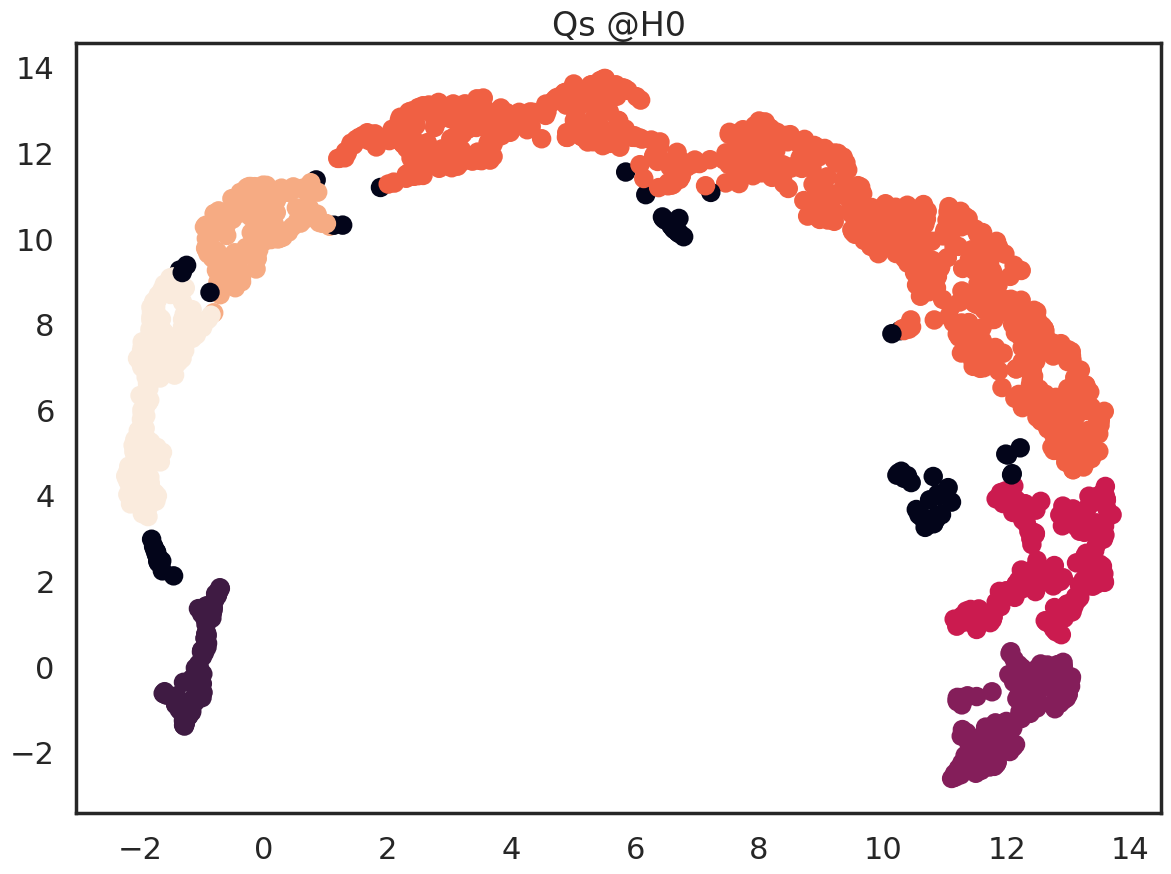

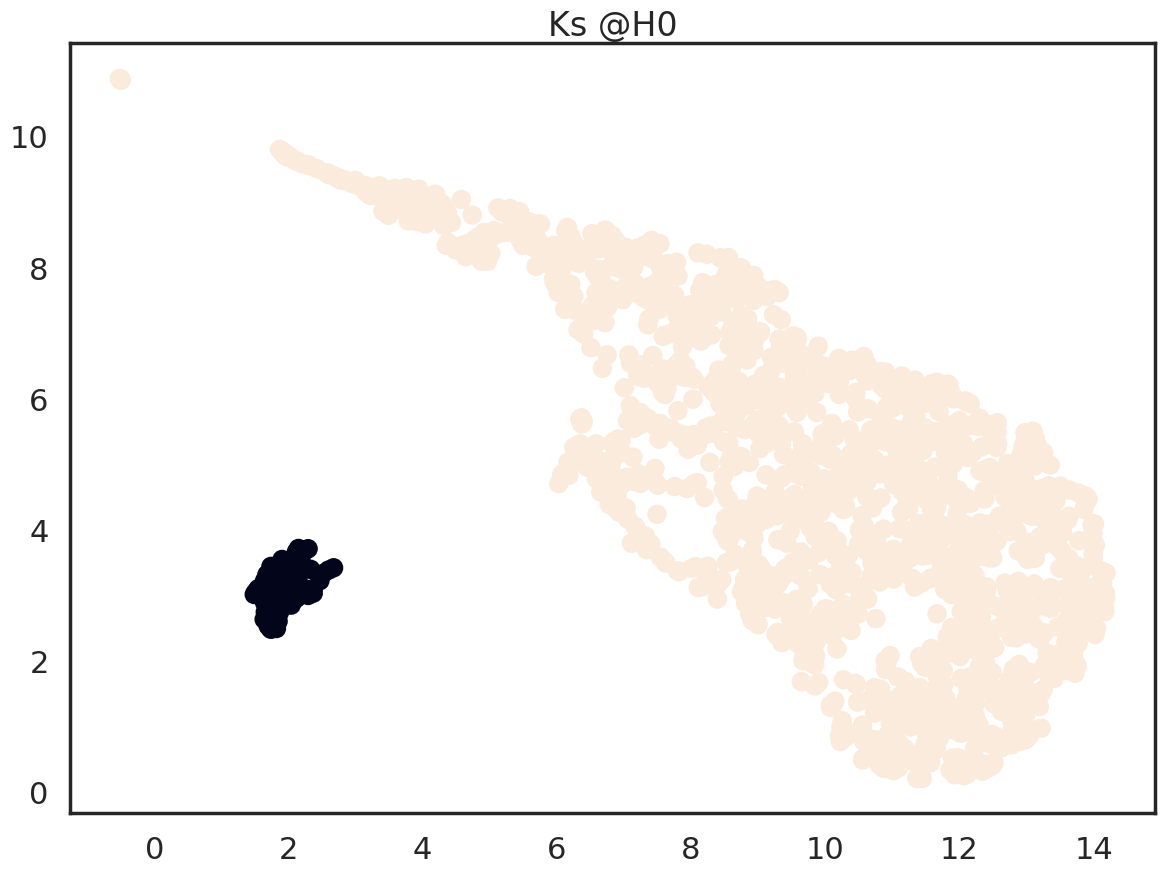

avg link count: 2889329, sparsity: 0.843303997634698
Top central genes: [('ENSG00000000460', 0.023783416315029577), ('ENSG00000003096', 0.023783416315029577), ('ENSG00000004399', 0.023783416315029577), ('ENSG00000005108', 0.023783416315029577), ('ENSG00000005189', 0.023783416315029577), ('ENSG00000006534', 0.023783416315029577), ('ENSG00000007047', 0.023783416315029577), ('ENSG00000007062', 0.023783416315029577), ('ENSG00000007944', 0.023783416315029577), ('ENSG00000008256', 0.023783416315029577), ('ENSG00000010292', 0.023783416315029577), ('ENSG00000010818', 0.023783416315029577), ('ENSG00000011478', 0.023783416315029577), ('ENSG00000011600', 0.023783416315029577), ('ENSG00000012124', 0.023783416315029577), ('ENSG00000013293', 0.023783416315029577), ('ENSG00000013374', 0.023783416315029577), ('ENSG00000018280', 0.023783416315029577), ('ENSG00000018408', 0.023783416315029577), ('ENSG00000021461', 0.023783416315029577), ('ENSG00000021645', 0.023783416315029577), ('ENSG00000024422', 0.02

In [5]:
grn_inferer = GRNfer(model, adata,
    how="most var within",
    preprocess="softmax",
    head_agg='max',
    cell_agg="mean",
    filtration="thresh",
    #k=
    #genes=
    #known_grn
)
grn = grn_inferer(cell_type="oligodendrocyte precursor cell", layer=3)

base enrichment
Top central genes: []


2024-04-04 16:10:23,659 [WARNING] Duplicated values found in preranked stats: 65.11% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


[]


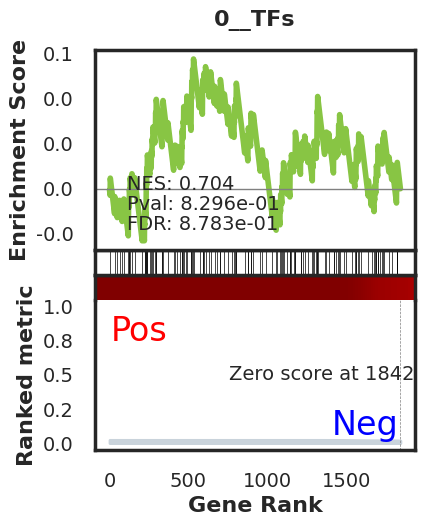

2024-04-04 16:10:24,543 [WARNING] Duplicated values found in preranked stats: 83.99% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


[]


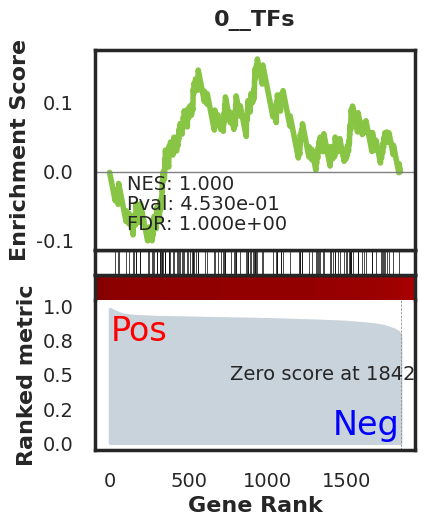

_________________________________________
TF specific enrichment


2024-04-04 16:10:26,113:INFO - Downloading and generating Enrichr library gene sets...
2024-04-04 16:10:26,116:INFO - Library is already downloaded in: /home/ml4ig1/.cache/gseapy/Enrichr.ENCODE_TF_ChIP-seq_2014.gmt, use local file
2024-04-04 16:10:26,343:INFO - 0332 gene_sets have been filtered out when max_size=2000 and min_size=0
2024-04-04 16:10:26,354 [WARNING] Duplicated values found in preranked stats: 86.16% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-04 16:10:26,488 [WARNING] Duplicated values found in preranked stats: 84.32% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-04 16:10:26,630 [WARNING] Duplicated values found in preranked stats: 89.04% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-04 16:10:26,775 [WARNING] Duplicated values found in preranked stats: 91.92% of genes
The order of those genes will be arbitrary, 

_________________________________________
found some significant results for  0.0 % TFs

omnipath overlap
intersection of 1166 genes
intersection pct: 0.6326641345632121
precision:  0.005320917020890832 
recall:  0.9892322097378277 
random recall: 0.9794351954618326


100%|██████████| 49/49 [01:02<00:00,  1.27s/it]


Area Under Precision-Recall Curve (AUPRC):  -0.00606464452301447
random precision is:  0.005268220495745468


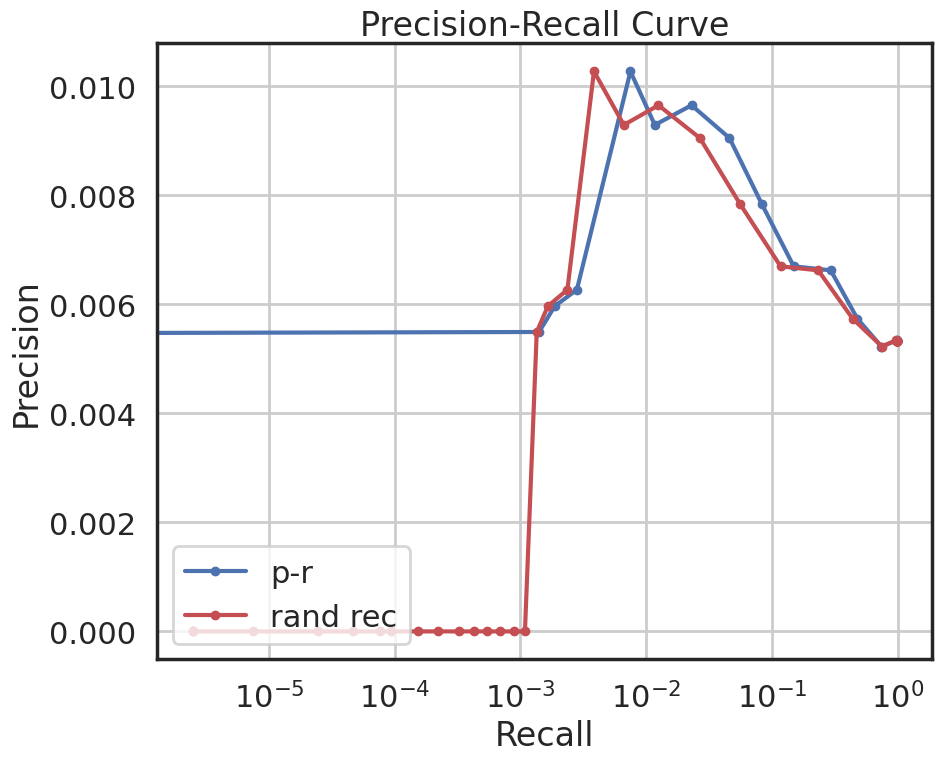

In [6]:
BenGRN(grn).scprint_benchmark()

## on a couple of cells only

Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

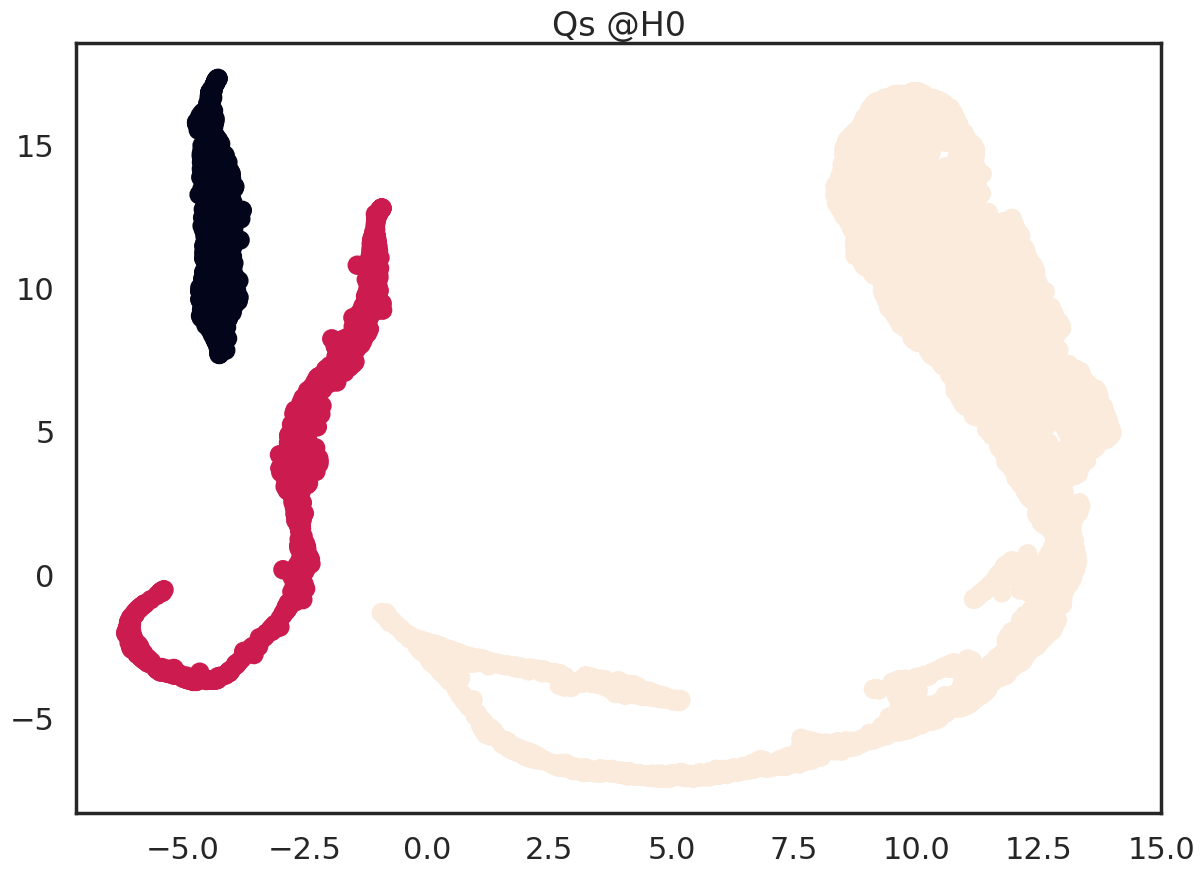

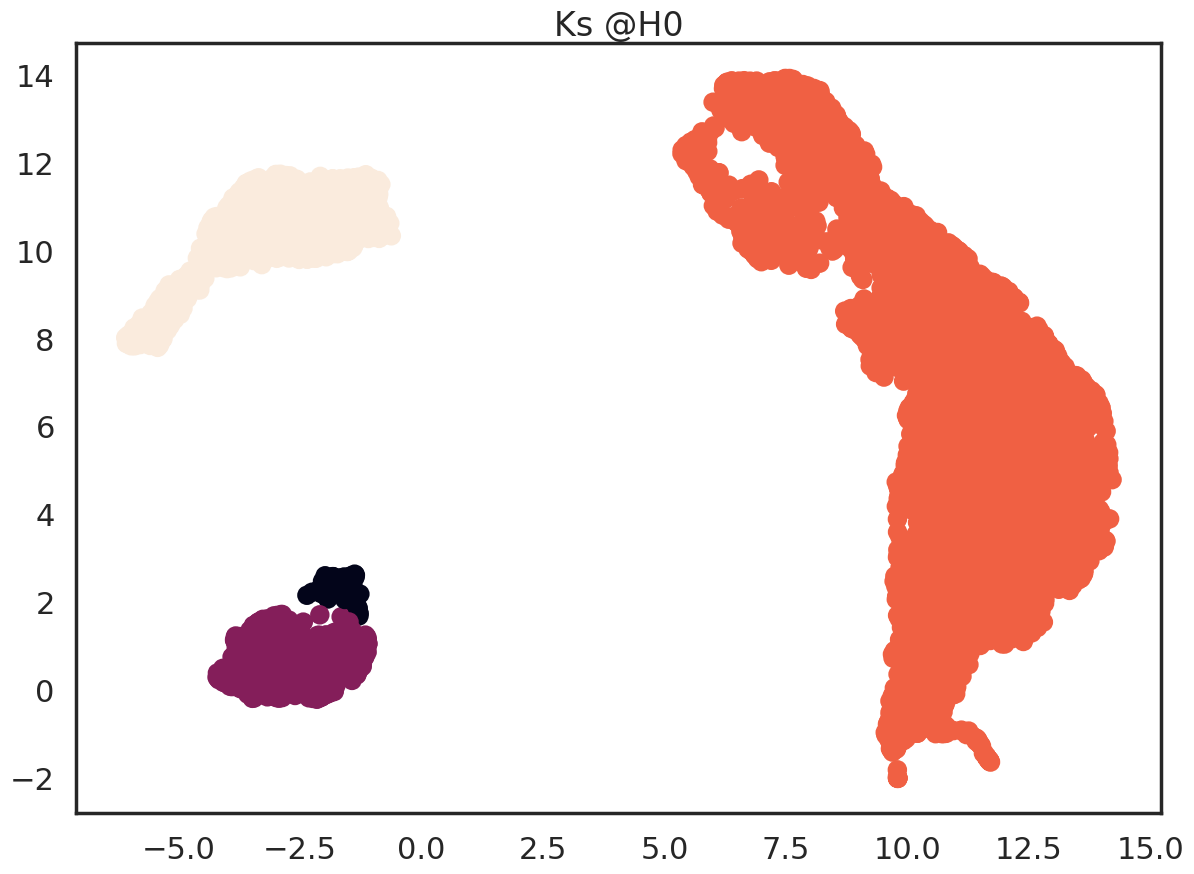

avg link count: 2241480, sparsity: 0.028839764197087624


In [8]:
grn_inferer = GRNfer(model, adata,
    how="random expr",
    preprocess="softmax",
    head_agg='max',
    cell_agg="mean",
    filtration="thresh",
    max_cells=8,
    #k=
    #genes=
    #known_grn
)
grn = grn_inferer(cell_type="oligodendrocyte precursor cell", layer=3)

base enrichment
Top central genes: []


2024-04-04 16:28:52,608 [WARNING] Duplicated values found in preranked stats: 30.16% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


[]


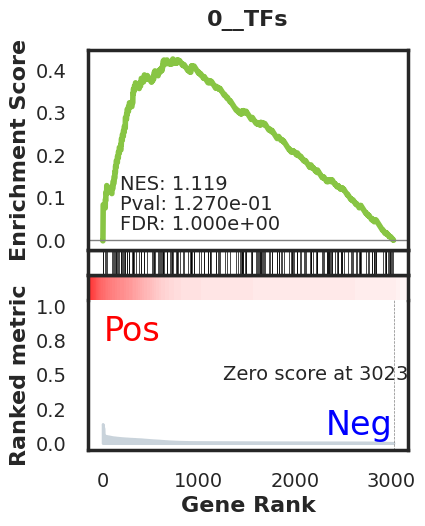

2024-04-04 16:28:53,671 [WARNING] Duplicated values found in preranked stats: 0.03% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


[]


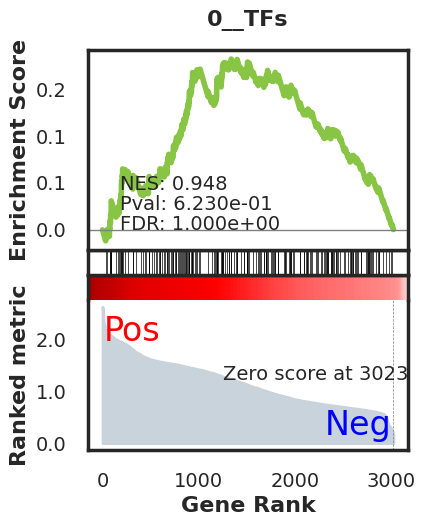

_________________________________________
TF specific enrichment


2024-04-04 16:28:56,198:INFO - Downloading and generating Enrichr library gene sets...
2024-04-04 16:28:56,200:INFO - Library is already downloaded in: /home/ml4ig1/.cache/gseapy/Enrichr.ENCODE_TF_ChIP-seq_2014.gmt, use local file
2024-04-04 16:28:56,406:INFO - 0332 gene_sets have been filtered out when max_size=2000 and min_size=0
2024-04-04 16:28:56,417 [WARNING] Duplicated values found in preranked stats: 99.57% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-04 16:28:56,610 [WARNING] Duplicated values found in preranked stats: 99.21% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-04 16:28:56,811 [WARNING] Duplicated values found in preranked stats: 99.60% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-04 16:28:57,039 [WARNING] Duplicated values found in preranked stats: 99.60% of genes
The order of those genes will be arbitrary, 

2024-04-04 16:28:58,100 [WARNING] Duplicated values found in preranked stats: 99.64% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-04 16:28:58,325 [WARNING] Duplicated values found in preranked stats: 98.81% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-04 16:28:58,555 [WARNING] Duplicated values found in preranked stats: 99.57% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-04 16:28:58,776 [WARNING] Duplicated values found in preranked stats: 98.81% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-04 16:28:58,991 [WARNING] Duplicated values found in preranked stats: 99.64% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-04 16:28:59,220 [WARNING] Duplicated values found in preranked stats: 99.64% of genes
The order of those genes w

_________________________________________
found some significant results for  0.0 % TFs

omnipath overlap
intersection of 2212 genes
intersection pct: 0.7314814814814815
precision:  0.003233808806591654 
recall:  0.01649344780840488 
random recall: 0.020992996444749473


100%|██████████| 49/49 [00:00<00:00, 89.92it/s]


Area Under Precision-Recall Curve (AUPRC):  -4.454891507457069e-05
random precision is:  0.004116018528593123


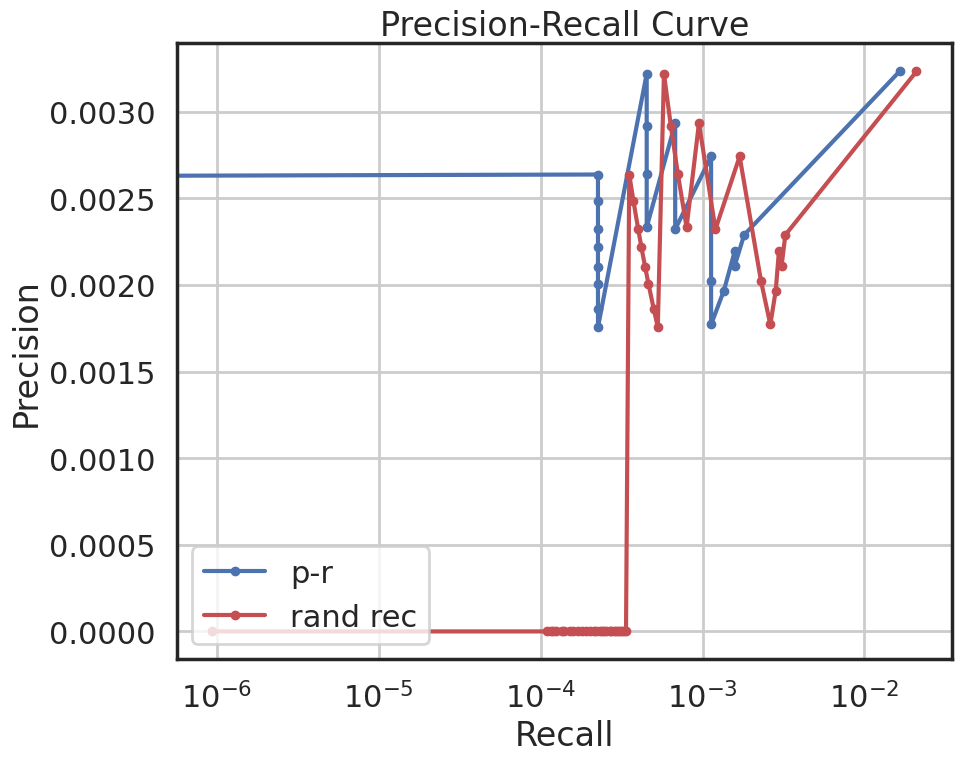

In [9]:
BenGRN(grn).scprint_benchmark()

## most var across

Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/torch/utils/tensorboard/__init__.py:4: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if not hasattr(tensorboard, "__version__") or LooseVersion(
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/torch/utils/tensorboard/__init__.py:6: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  ) < LooseVersion("1.15"):
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

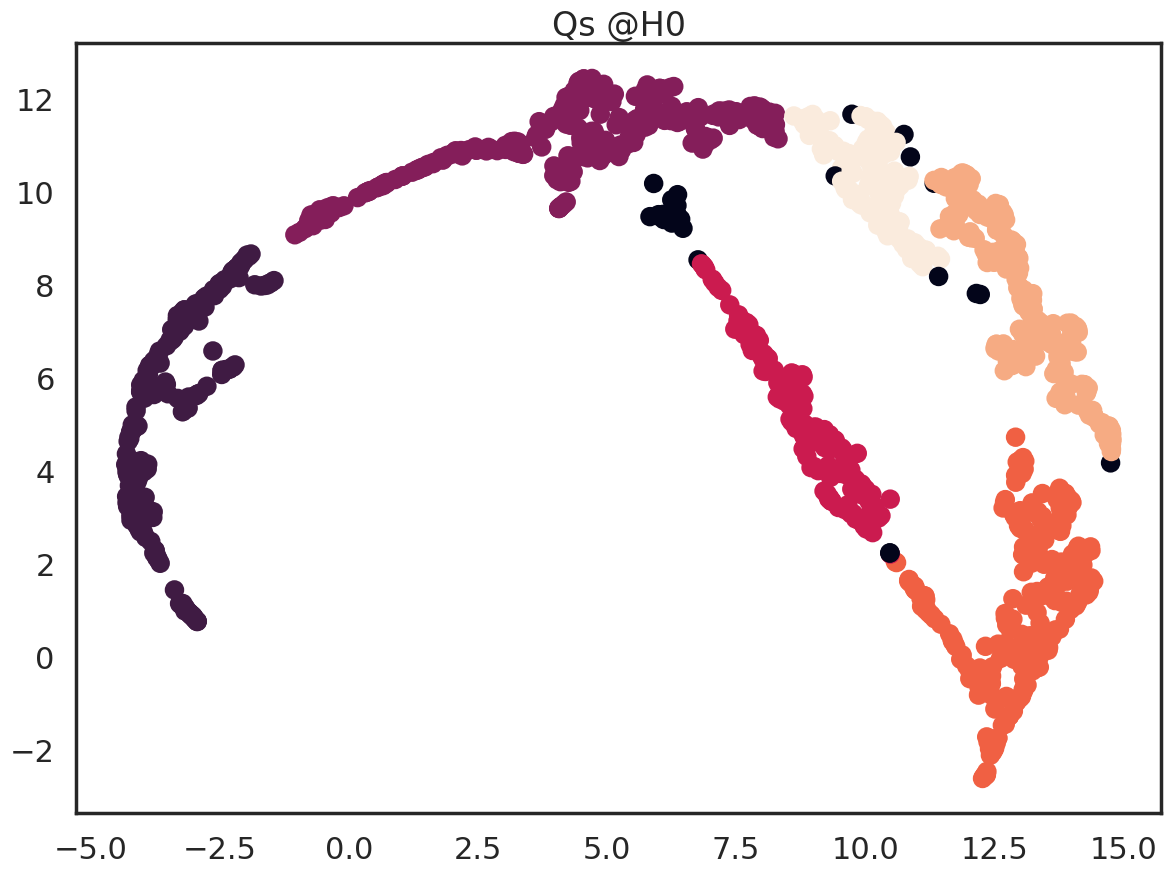

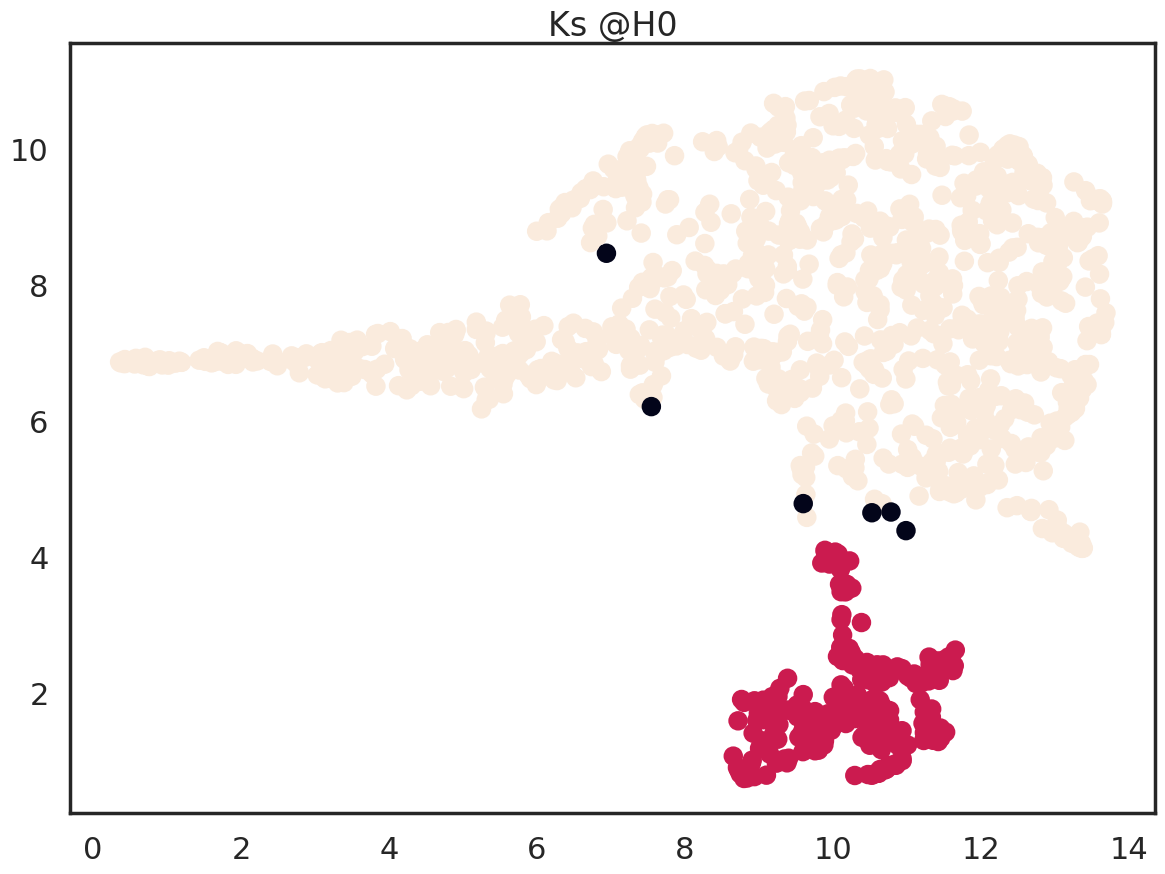

avg link count: 1949524, sparsity: 0.8493825224106569


In [5]:
grn_inferer = GRNfer(model, adata,
    how="most var across",
    preprocess="softmax",
    head_agg='max',
    cell_agg="mean",
    filtration="thresh",
    #k=
    #genes=
    #known_grn
)
grn = grn_inferer(cell_type="oligodendrocyte precursor cell", layer=3)

base enrichment


Top central genes: []


2024-04-04 17:06:31,071 [WARNING] Duplicated values found in preranked stats: 58.01% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


['celltype.gmt__Mesangial cells', 'celltype.gmt__Acinar cells']


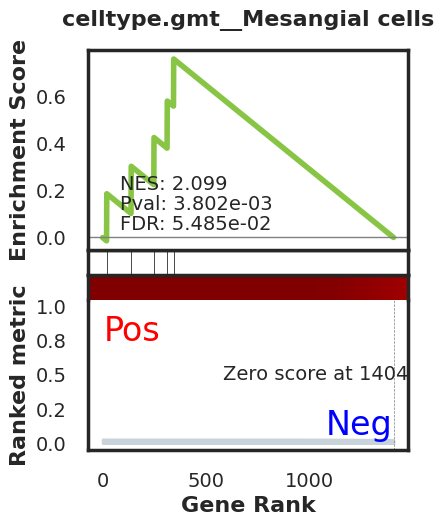

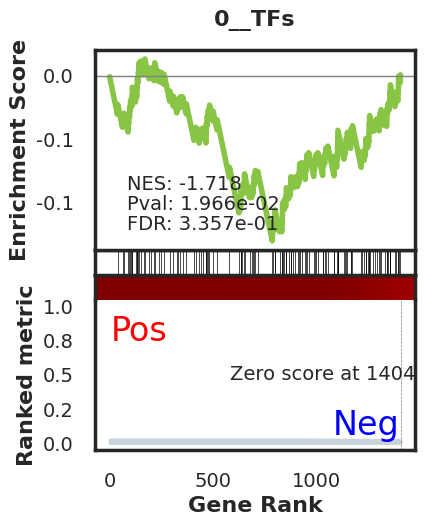

2024-04-04 17:06:32,171 [WARNING] Duplicated values found in preranked stats: 76.01% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


[]


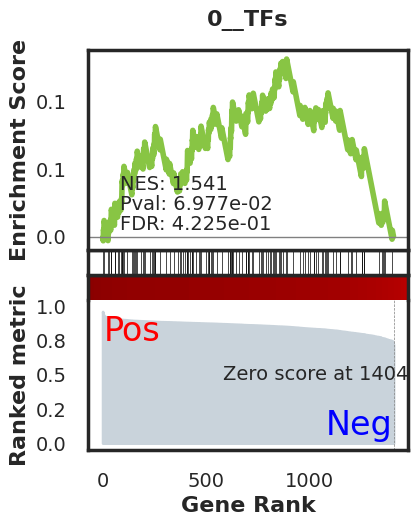

_________________________________________
TF specific enrichment


2024-04-04 17:06:33,515:INFO - Downloading and generating Enrichr library gene sets...
2024-04-04 17:06:33,518:INFO - Library is already downloaded in: /home/ml4ig1/.cache/gseapy/Enrichr.ENCODE_TF_ChIP-seq_2014.gmt, use local file
2024-04-04 17:06:33,728:INFO - 0332 gene_sets have been filtered out when max_size=2000 and min_size=0
2024-04-04 17:06:33,738 [WARNING] Duplicated values found in preranked stats: 84.63% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-04 17:06:33,841 [WARNING] Duplicated values found in preranked stats: 85.34% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


found!  0__TCF12
0    1.544575
Name: NES, dtype: object




2024-04-04 17:06:33,965 [WARNING] Duplicated values found in preranked stats: 84.63% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-04 17:06:34,112 [WARNING] Duplicated values found in preranked stats: 84.63% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-04 17:06:34,225 [WARNING] Duplicated values found in preranked stats: 85.34% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


_________________________________________
found some significant results for  20.0 % TFs

omnipath overlap
intersection of 874 genes
intersection pct: 0.6220640569395017
precision:  0.008881618562081008 
recall:  0.9855233853006682 
random recall: 0.9819561468341956


100%|██████████| 49/49 [00:17<00:00,  2.77it/s]


Area Under Precision-Recall Curve (AUPRC):  -0.008922796191966606
random precision is:  0.008849470312884947


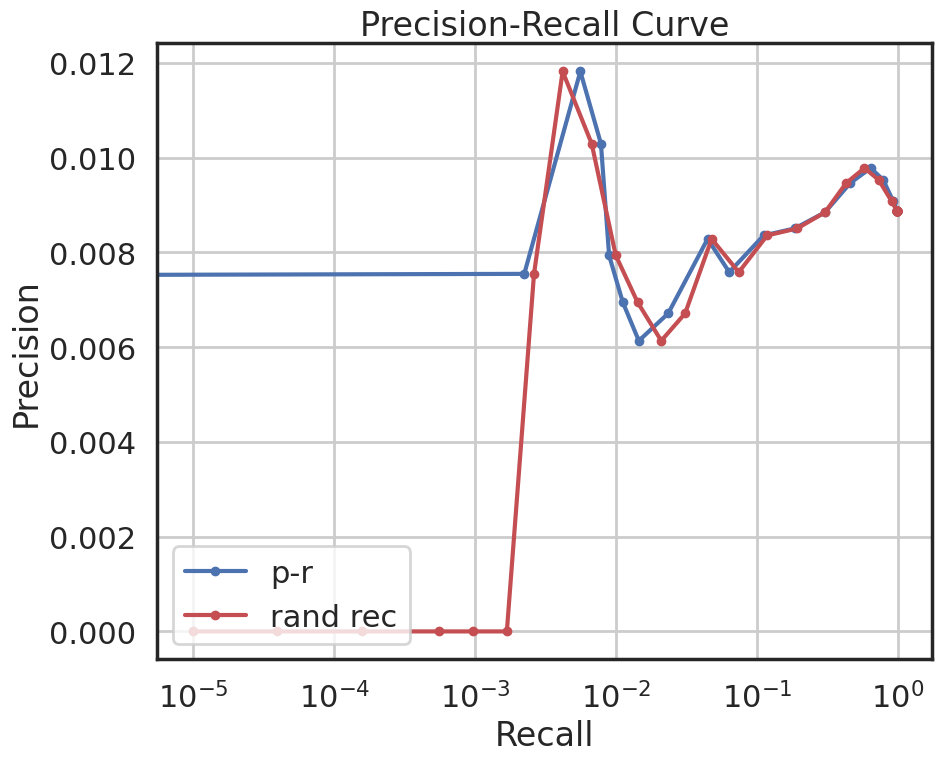

In [6]:
BenGRN(grn).scprint_benchmark()

## mean head

In [ ]:
grn_inferer = GRNfer(model, adata,
    how="random expr",
    preprocess="softmax",
    head_agg='mean',
    cell_agg="mean",
    filtration="thresh",
    #k=
    #genes=
    #known_grn
)
grn = grn_inferer(cell_type="oligodendrocyte precursor cell", layer=3)

In [ ]:
BenGRN(grn).scprint_benchmark()

## consensus

In [70]:
grn_inferer = GRNfer(model, adata,
    how="most var across",
    preprocess="softmax",
    head_agg='mean',
    cell_agg="consensus",
    filtration="thresh",
    max_cells=8,
    #k=
    #genes=
    #known_grn
)
grn = grn_inferer(cell_type="oligodendrocyte precursor cell", layer=3)

Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

avg link count: 42943, sparsity: 0.018709712555413958
avg link count: 51016, sparsity: 0.022227014780685988
avg link count: 46704, sparsity: 0.02034833186288926
avg link count: 46616, sparsity: 0.02030999139517912
avg link count: 48150, sparsity: 0.02097833545730811
avg link count: 45662, sparsity: 0.019894345870230586
avg link count: 59270, sparsity: 0.025823176377043646
avg link count: 41048, sparsity: 0.017884085438246794
Top central genes: [('ENSG00000167526', 0.10814540367929536), ('ENSG00000166710', 0.10694961030988112), ('ENSG00000157890', 0.10448789926358418), ('ENSG00000114166', 0.10060928792099352), ('ENSG00000156103', 0.09834480343620339), ('ENSG00000187527', 0.09825278410575072), ('ENSG00000110693', 0.09638942157743088), ('ENSG00000204525', 0.09566737470152933), ('ENSG00000187323', 0.0945126163811742), ('ENSG00000244405', 0.09142865496726063), ('ENSG00000103260', 0.09031991972610642), ('ENSG00000153822', 0.08908663491465627), ('ENSG00000167094', 0.08747001867856356), ('ENSG

base enrichment
Top central genes: []
[]


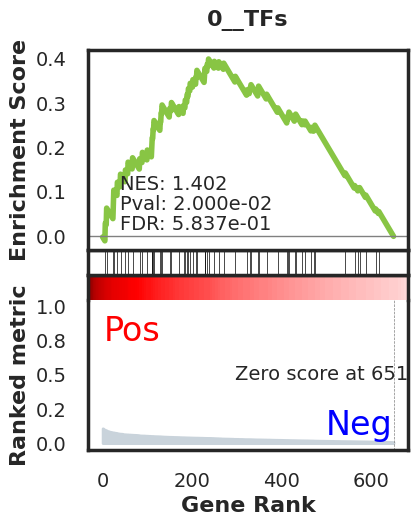

2024-04-04 15:16:41,876 [WARNING] Duplicated values found in preranked stats: 54.75% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


[]


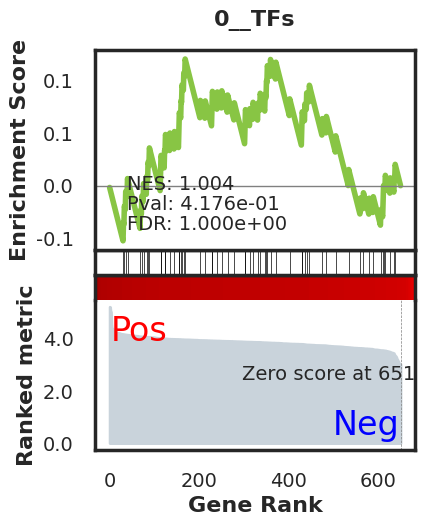

_________________________________________
TF specific enrichment


2024-04-04 15:16:43,230:INFO - Downloading and generating Enrichr library gene sets...
2024-04-04 15:16:43,233:INFO - Library is already downloaded in: /home/ml4ig1/.cache/gseapy/Enrichr.ENCODE_TF_ChIP-seq_2014.gmt, use local file
2024-04-04 15:16:43,493:INFO - 0332 gene_sets have been filtered out when max_size=2000 and min_size=0
2024-04-04 15:16:43,501 [WARNING] Duplicated values found in preranked stats: 95.71% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-04 15:16:43,572 [WARNING] Duplicated values found in preranked stats: 95.55% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-04 15:16:43,652 [WARNING] Duplicated values found in preranked stats: 95.71% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-04 15:16:43,724 [WARNING] Duplicated values found in preranked stats: 95.71% of genes
The order of those genes will be arbitrary, 

_________________________________________
found some significant results for  0.0 % TFs

omnipath overlap
intersection of 473 genes
intersection pct: 0.7254601226993865
precision:  0.009269442262372349 
recall:  0.13470319634703196 
random recall: 0.214700128179181


100%|██████████| 49/49 [00:00<00:00, 378.17it/s]


Area Under Precision-Recall Curve (AUPRC):  -0.0010554409317041402
random precision is:  0.014774337178708763


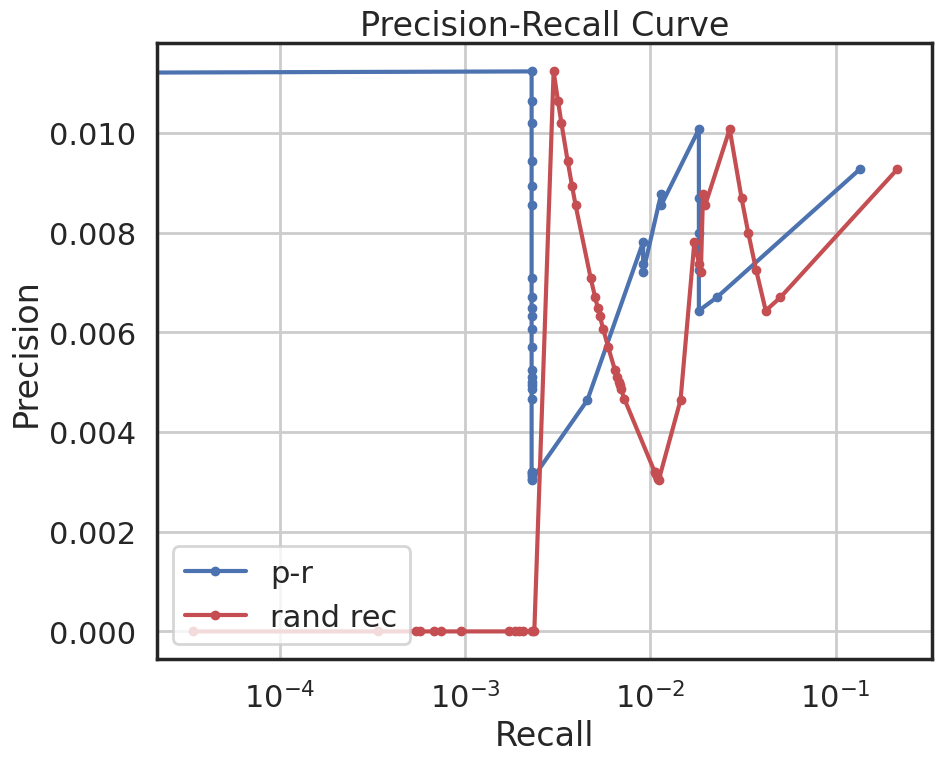

In [71]:
BenGRN(grn).scprint_benchmark()

## sinkhorn

Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

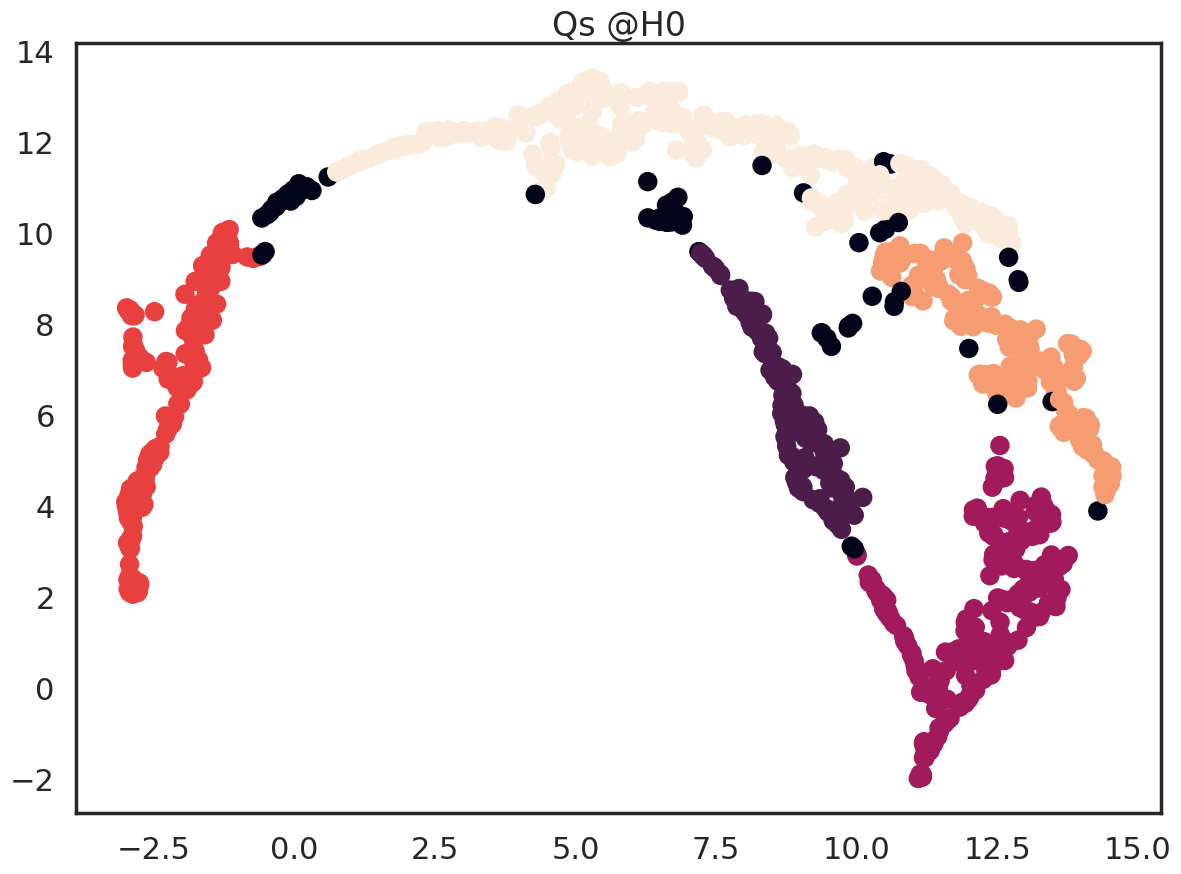

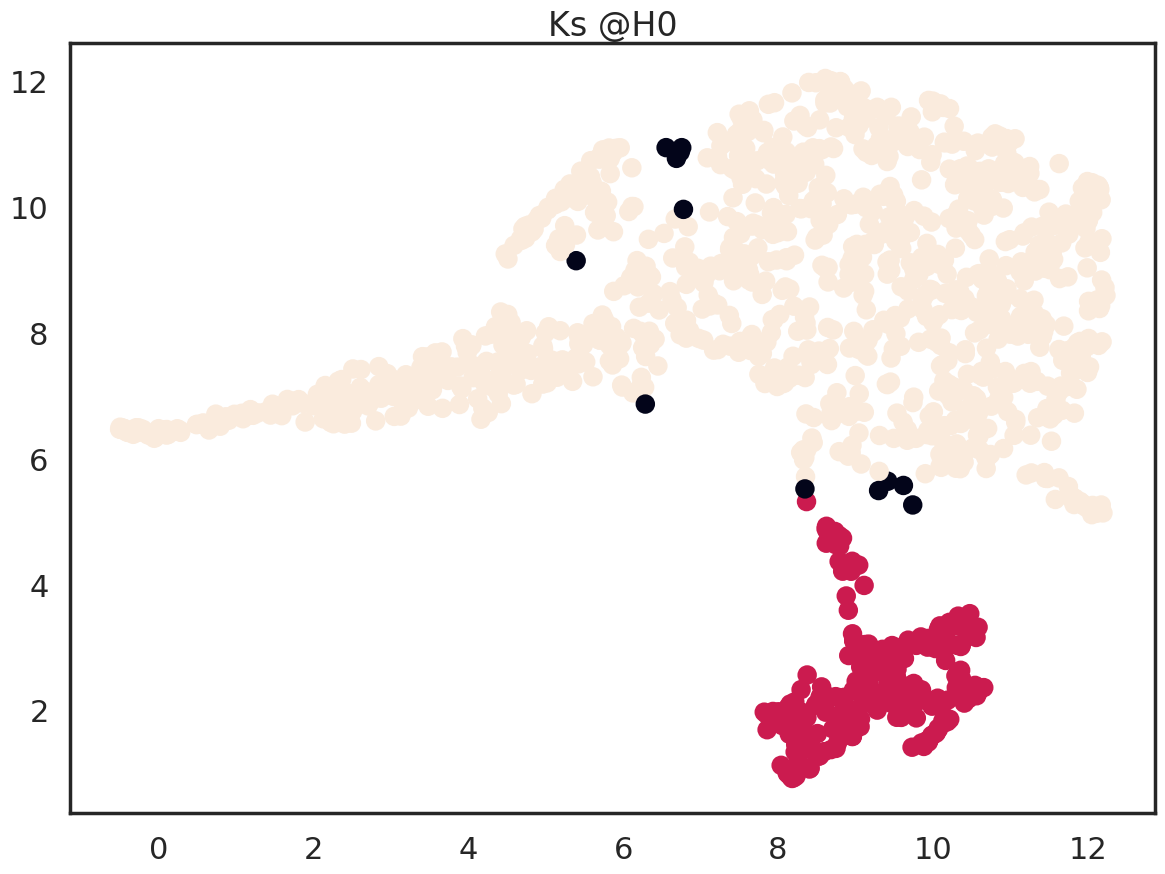

avg link count: 1904020, sparsity: 0.8295570151074514
Top central genes: [('ENSG00000049540', 0.027420092935645866), ('ENSG00000085117', 0.027420092935645866), ('ENSG00000103490', 0.027420092935645866), ('ENSG00000104419', 0.027420092935645866), ('ENSG00000111321', 0.027420092935645866), ('ENSG00000114315', 0.027420092935645866), ('ENSG00000129757', 0.027420092935645866), ('ENSG00000130203', 0.027420092935645866), ('ENSG00000136160', 0.027420092935645866), ('ENSG00000141756', 0.027420092935645866), ('ENSG00000148180', 0.027420092935645866), ('ENSG00000155368', 0.027420092935645866), ('ENSG00000156968', 0.027420092935645866), ('ENSG00000159251', 0.027420092935645866), ('ENSG00000160808', 0.027420092935645866), ('ENSG00000164889', 0.027420092935645866), ('ENSG00000169908', 0.027420092935645866), ('ENSG00000172005', 0.027420092935645866), ('ENSG00000172927', 0.027420092935645866), ('ENSG00000175697', 0.027420092935645866), ('ENSG00000182175', 0.027420092935645866), ('ENSG00000186603', 0.0

In [55]:
grn_inferer = GRNfer(model, adata,
    how="most var across",
    preprocess="sinkhorn",
    head_agg='max',
    cell_agg="mean",
    filtration="thresh",
    #k=
    #known_grn
)
grn = grn_inferer(cell_type="oligodendrocyte precursor cell", layer=3)

base enrichment
Top central genes: []


2024-04-04 14:24:05,613 [WARNING] Duplicated values found in preranked stats: 1.99% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


[]


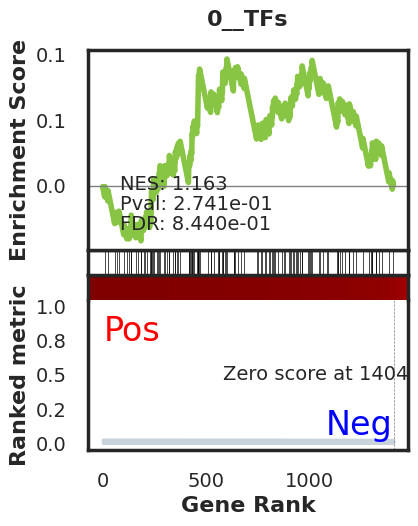

2024-04-04 14:24:06,690 [WARNING] Duplicated values found in preranked stats: 65.12% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


['celltype.gmt__Oligodendrocyte precursor cells']


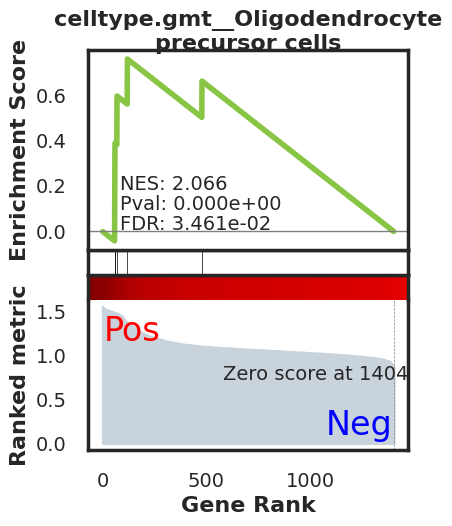

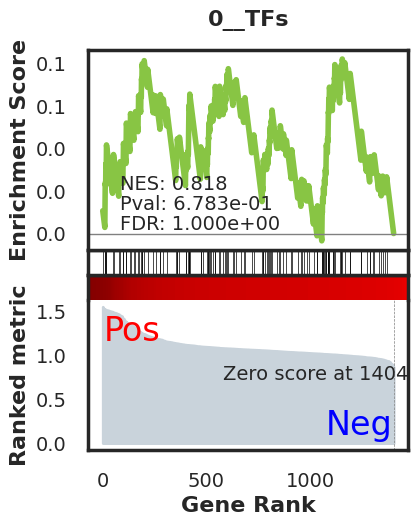

_________________________________________
TF specific enrichment


2024-04-04 14:24:08,959:INFO - Downloading and generating Enrichr library gene sets...
2024-04-04 14:24:08,962:INFO - Library is already downloaded in: /home/ml4ig1/.cache/gseapy/Enrichr.ENCODE_TF_ChIP-seq_2014.gmt, use local file
2024-04-04 14:24:09,176:INFO - 0332 gene_sets have been filtered out when max_size=2000 and min_size=0
2024-04-04 14:24:09,185 [WARNING] Duplicated values found in preranked stats: 98.43% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-04 14:24:09,291 [WARNING] Duplicated values found in preranked stats: 96.73% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


found!  0__TCF12
0    1.278913
Name: NES, dtype: object




2024-04-04 14:24:09,419 [WARNING] Duplicated values found in preranked stats: 98.43% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-04 14:24:09,563 [WARNING] Duplicated values found in preranked stats: 98.43% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-04 14:24:09,675 [WARNING] Duplicated values found in preranked stats: 96.73% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


_________________________________________
found some significant results for  20.0 % TFs

omnipath overlap
intersection of 874 genes
intersection pct: 0.6220640569395017
precision:  0.008860237546890871 
recall:  0.9810690423162584 
random recall: 0.9798768169499876


100%|██████████| 49/49 [00:02<00:00, 16.40it/s]


Area Under Precision-Recall Curve (AUPRC):  -0.009444822243575048
random precision is:  0.008849470312884947


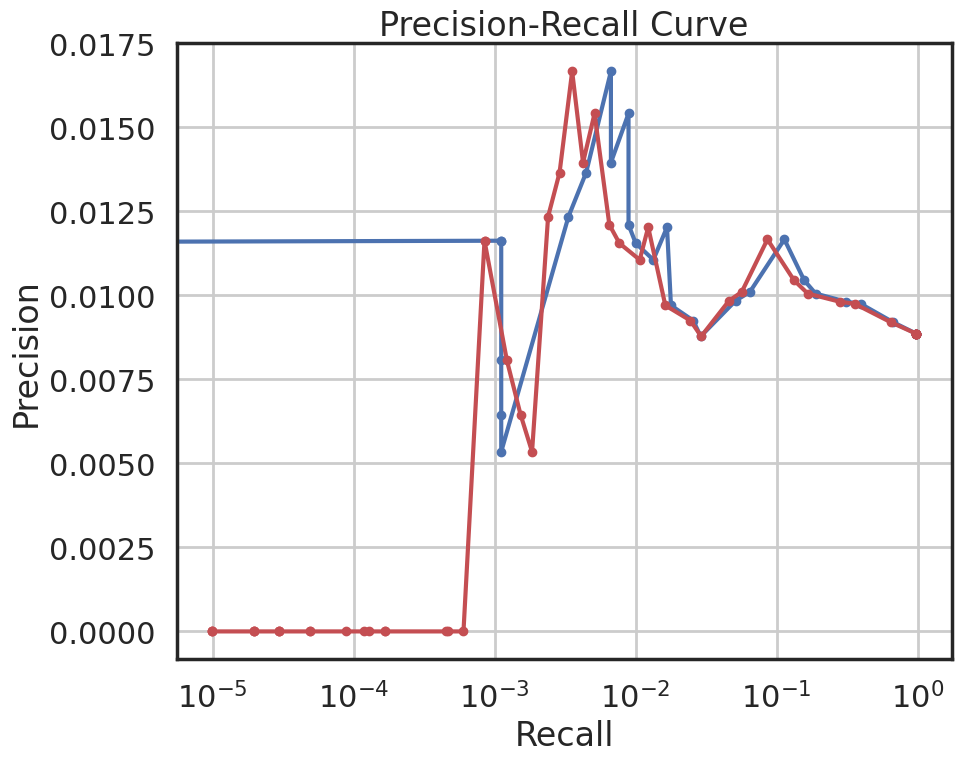

In [63]:
BenGRN(grn).scprint_benchmark()

## top-k

Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

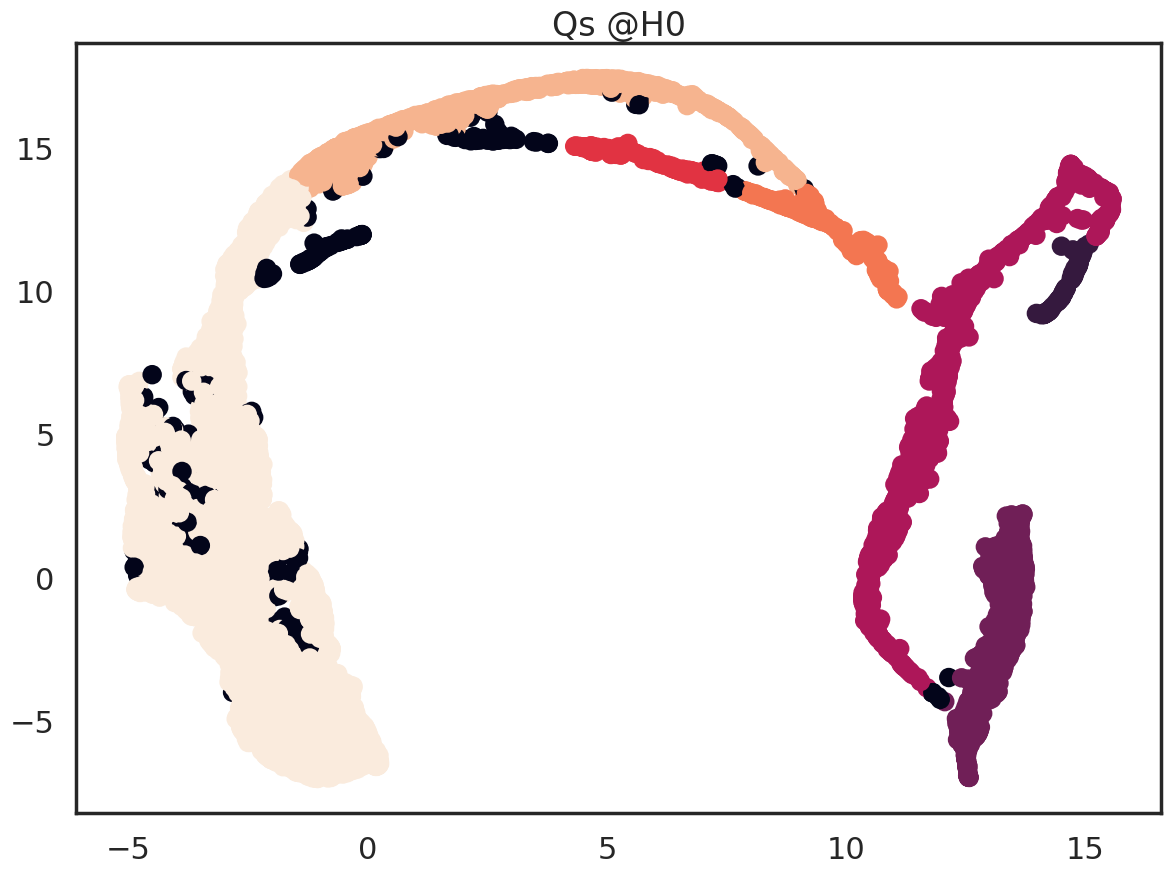

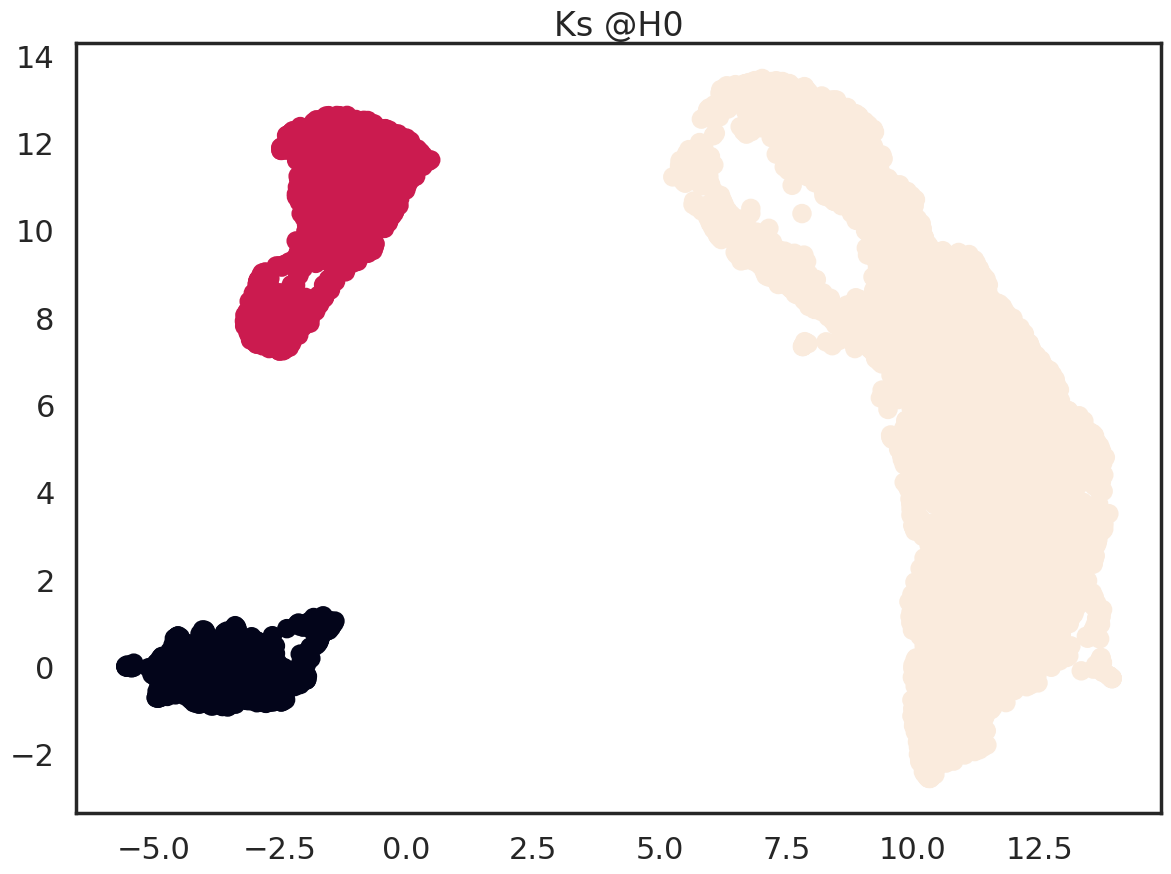

Top central genes: [('ENSG00000167491', 0.22487114759567556), ('ENSG00000072134', 0.22221055147636962), ('ENSG00000167130', 0.2221209483788047), ('ENSG00000183020', 0.22204173708608468), ('ENSG00000067900', 0.21704718615813162), ('ENSG00000101493', 0.21326661358229504), ('ENSG00000015133', 0.19714142483583075), ('ENSG00000154832', 0.1962591964208915), ('ENSG00000142856', 0.16557251406263634), ('ENSG00000006634', 0.16528675657040875), ('ENSG00000126500', 0.13974621349736605), ('ENSG00000033178', 0.13714600222116788), ('ENSG00000151849', 0.11998191461003642), ('ENSG00000198739', 0.09557196385115871), ('ENSG00000160207', 0.09531545550173239), ('ENSG00000165030', 0.08890876128705792), ('ENSG00000062485', 0.08061521415060591), ('ENSG00000130363', 0.06706067361544948), ('ENSG00000187187', 0.05653765025730753), ('ENSG00000076321', 0.04292062072147092), ('ENSG00000140992', 0.03862824521313484), ('ENSG00000010072', 0.036498652552309226), ('ENSG00000134313', 0.03526353888028805), ('ENSG000001353

In [79]:
grn_inferer = GRNfer(model, adata,
    how="random expr",
    preprocess="softmax",
    head_agg='max', #mean
    cell_agg="mean",
    filtration="top-k",
    k=50,
    max_cells=8,
    #known_grn
)
grn = grn_inferer(cell_type="oligodendrocyte precursor cell", layer=3)

In [85]:
(grn.grn!=0).sum(1).mean()

12.69678914266799

base enrichment
Top central genes: []


2024-04-04 15:49:01,334 [WARNING] Duplicated values found in preranked stats: 72.92% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


[]


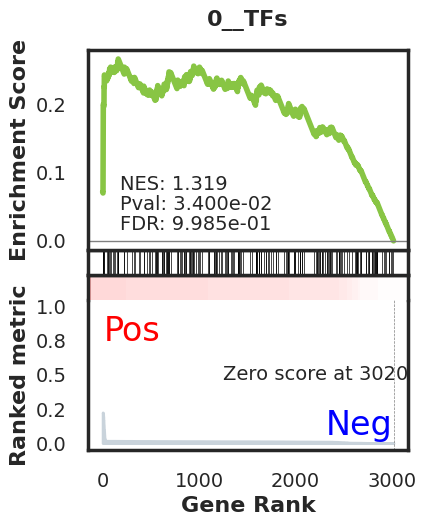

[]


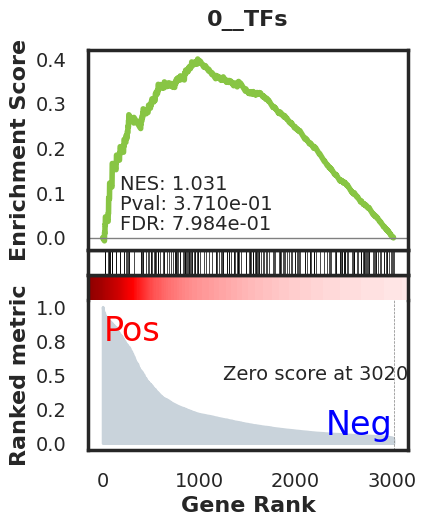

_________________________________________
TF specific enrichment


2024-04-04 15:49:03,949:INFO - Downloading and generating Enrichr library gene sets...
2024-04-04 15:49:03,960:INFO - Library is already downloaded in: /home/ml4ig1/.cache/gseapy/Enrichr.ENCODE_TF_ChIP-seq_2014.gmt, use local file
2024-04-04 15:49:04,194:INFO - 0332 gene_sets have been filtered out when max_size=2000 and min_size=0
2024-04-04 15:49:04,216 [WARNING] Duplicated values found in preranked stats: 99.74% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-04 15:49:04,442 [WARNING] Duplicated values found in preranked stats: 99.57% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-04 15:49:04,659 [WARNING] Duplicated values found in preranked stats: 99.70% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-04 15:49:04,887 [WARNING] Duplicated values found in preranked stats: 99.47% of genes
The order of those genes will be arbitrary, 

_________________________________________
found some significant results for  0.0 % TFs

omnipath overlap
intersection of 2185 genes
intersection pct: 0.7232704402515723
precision:  0.0029276453366792136 
recall:  0.006899270648531441 
random recall: 0.010791503282133495


100%|██████████| 49/49 [00:00<00:00, 109.52it/s]


Area Under Precision-Recall Curve (AUPRC):  -1.0099308770330423e-05
random precision is:  0.004579280313698304


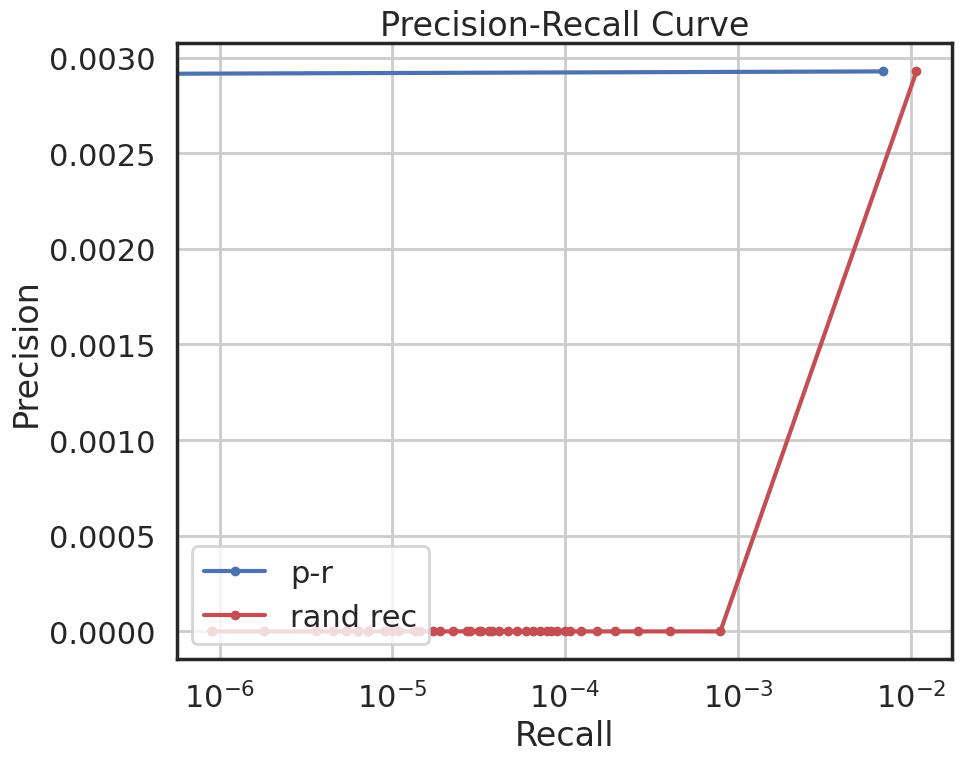

In [84]:
BenGRN(grn).scprint_benchmark()

# mst

In [ ]:
grn_inferer = GRNfer(model, adata,
    how="most var without",
    preprocess="softmax",
    head_agg='mean',
    cell_agg="consensus",
    filtration="mst",
)
grn = grn_inferer(cell_type="oligodendrocyte precursor cell", layer=3)

In [ ]:
BenGRN(grn).scprint_benchmark()

## tmfg

Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

Exception ignored on calling ctypes callback function: <function ExecutionEngine._raw_object_cache_notify at 0x7f86fba53760>
Traceback (most recent call last):
  File "/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/llvmlite/binding/executionengine.py", line 171, in _raw_object_cache_notify
    def _raw_object_cache_notify(self, data):
KeyboardInterrupt: 


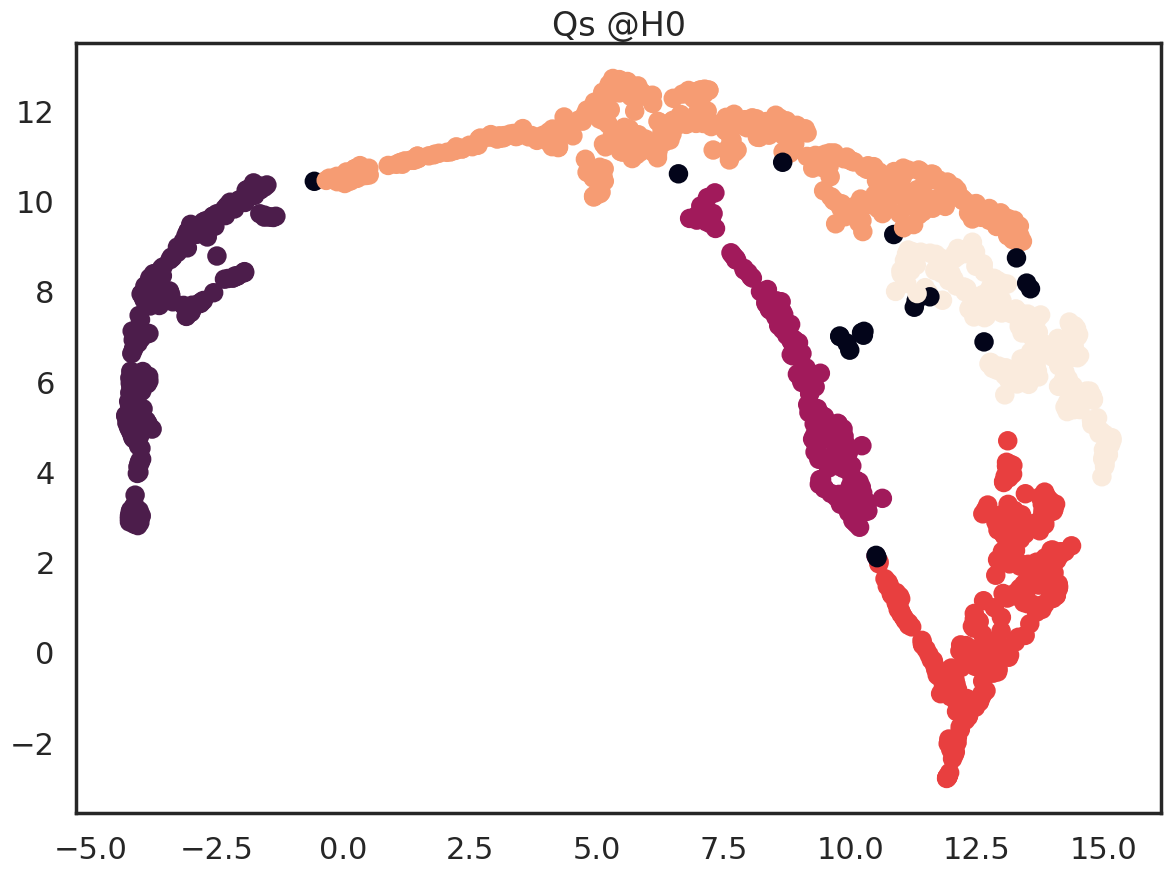

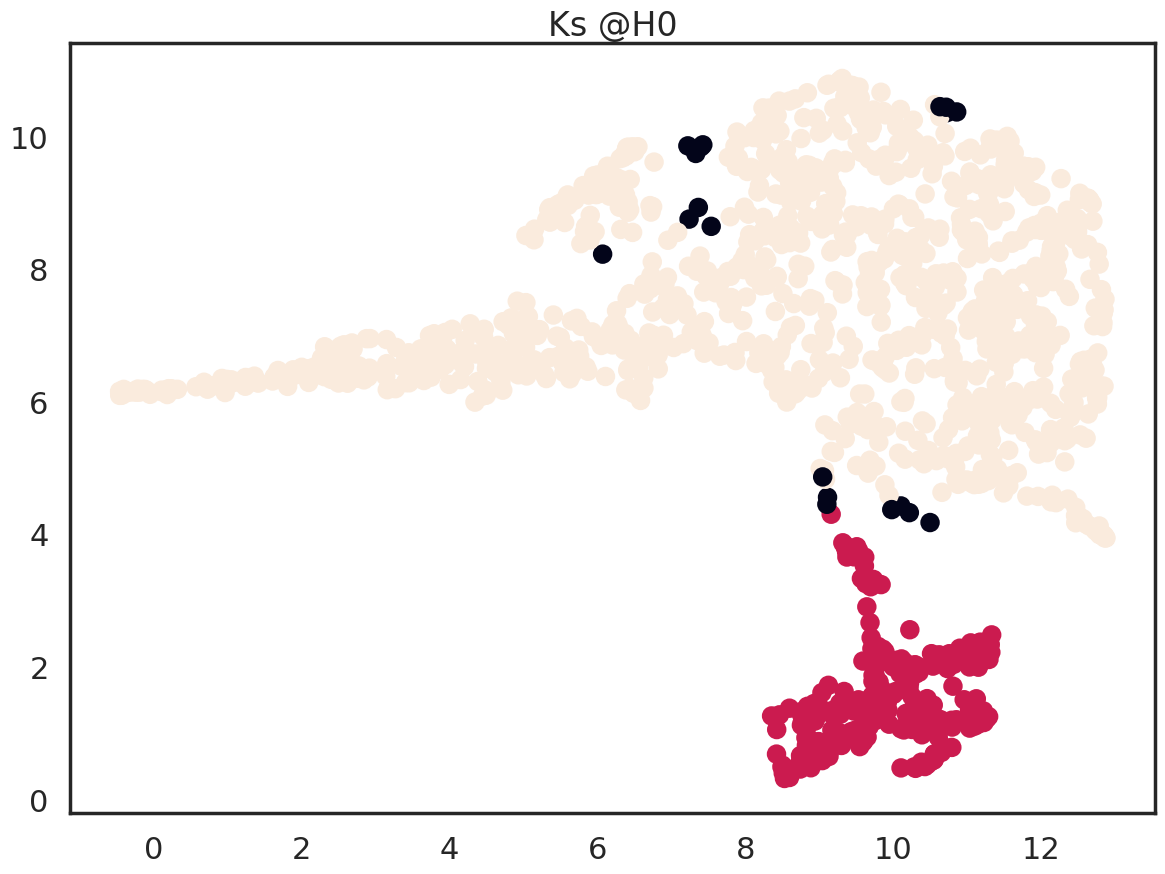

In [87]:
grn_inferer = GRNfer(model, adata,
    how="most var across",
    preprocess="softmax",
    head_agg='max',
    cell_agg="mean",
    filtration="tmfg",
    #k=
)
grn = grn_inferer(cell_type="oligodendrocyte precursor cell", layer=3)

In [ ]:
BenGRN(grn).scprint_benchmark()

## GRNBoost2

In [4]:
from bengrn import compute_genie3, compute_scenic
import scanpy as sc

In [5]:
sc.tl.rank_genes_groups(
    adata, groupby="cell_type", groups=["oligodendrocyte precursor cell"]
)
curr_genes = adata.uns["rank_genes_groups"]["names"]["oligodendrocyte precursor cell"][
    : 5000
].tolist()

In [6]:
subadata = adata[:, adata.var.index.isin(curr_genes)]

In [12]:
grn = compute_genie3(subadata)

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 30 threads


KeyboardInterrupt: 

base enrichment


Top central genes: []
['celltype.gmt__Oligodendrocytes', 'celltype.gmt__Oligodendrocyte precursor cells', 'celltype.gmt__Melanocytes', 'celltype.gmt__Mesangial cells', 'celltype.gmt__Astrocytes', 'celltype.gmt__Classical Monocytes']


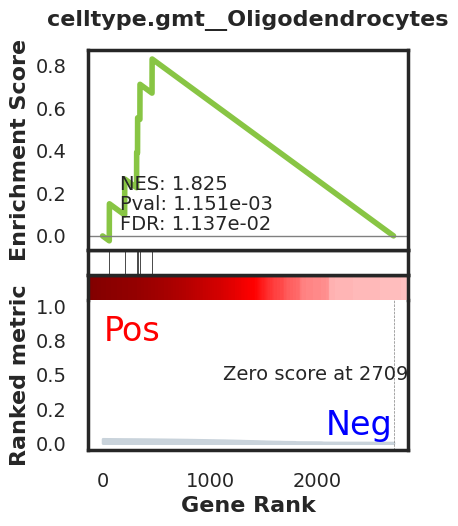

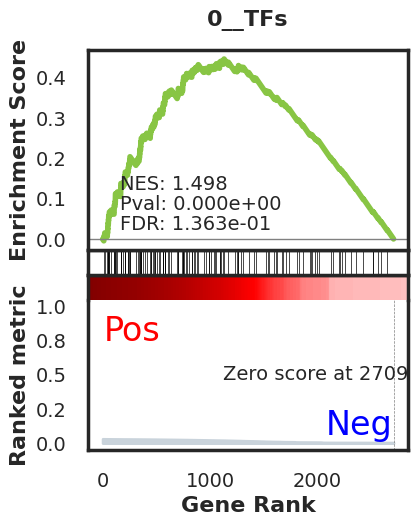

[]


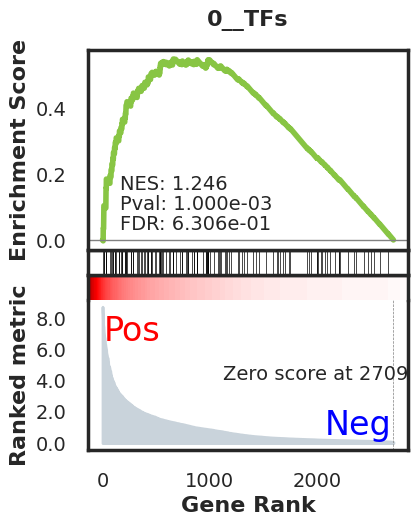

_________________________________________
TF specific enrichment


2024-04-04 17:15:52,760:INFO - Downloading and generating Enrichr library gene sets...
2024-04-04 17:15:52,772:INFO - Library is already downloaded in: /home/ml4ig1/.cache/gseapy/Enrichr.ENCODE_TF_ChIP-seq_2014.gmt, use local file
2024-04-04 17:15:52,993:INFO - 0332 gene_sets have been filtered out when max_size=2000 and min_size=0
2024-04-04 17:15:53,004 [WARNING] Duplicated values found in preranked stats: 40.52% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-04 17:15:53,181 [WARNING] Duplicated values found in preranked stats: 32.18% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-04 17:15:53,368 [WARNING] Duplicated values found in preranked stats: 40.52% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-04 17:15:53,569 [WARNING] Duplicated values found in preranked stats: 40.52% of genes
The order of those genes will be arbitrary, 

_________________________________________
found some significant results for  0.0 % TFs

omnipath overlap
intersection of 885 genes
intersection pct: 0.32656826568265684
precision:  0.009529009529009529 
recall:  0.8144444444444444 
random recall: 0.7513625974330422


100%|██████████| 49/49 [00:00<00:00, 197.99it/s]


Area Under Precision-Recall Curve (AUPRC):  -0.00904195808208253
random precision is:  0.008790951180917776


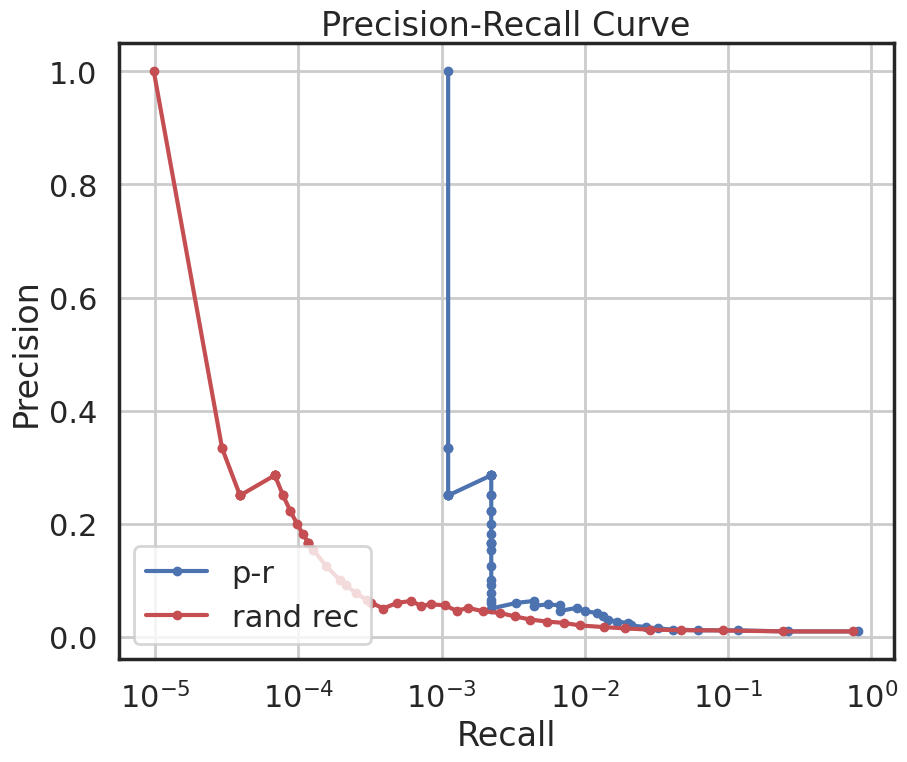

In [ ]:
BenGRN(grn).scprint_benchmark()

In [8]:
subadata.var_names = subadata.var.symbol

In [9]:
grn = compute_scenic(subadata)

preparing dask client


2024-04-04 17:50:13,786:INFO - To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
2024-04-04 17:50:13,846:INFO - State start
2024-04-04 17:50:13,855:INFO -   Scheduler at:     tcp://127.0.0.1:39205
2024-04-04 17:50:13,856:INFO -   dashboard at:  http://127.0.0.1:8787/status
2024-04-04 17:50:13,858:INFO - Registering Worker plugin shuffle
2024-04-04 17:50:13,913:INFO -         Start Nanny at: 'tcp://127.0.0.1:43211'
2024-04-04 17:50:13,919:INFO -         Start Nanny at: 'tcp://127.0.0.1:39557'
2024-04-04 17:50:13,927:INFO -         Start Nanny at: 'tcp://127.0.0.1:35827'
2024-04-04 17:50:13,936:INFO -         Start Nanny at: 'tcp://127.0.0.1:32979'
2024-04-04 17:50:13,946:INFO -         Start Nanny at: 'tcp://127.0.0.1:41811'
2024-04-04 17:50:13,956:INFO -         Start Nanny at: 'tcp://127.0.0.1:46633'
2024-04-04 17:50:13,966:INFO -         Start Nanny at: 'tcp://127.0.0.1:46873'
2024-04-04 17:50:13,979:INFO -     

parsing input
creating dask graph
8 partitions
computing dask graph


2024-04-04 17:50:25,976:INFO - Event loop was unresponsive in Nanny for 3.01s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.


In [ ]:
BenGRN(grn).scprint_benchmark()